<a href="https://colab.research.google.com/github/alfanashfak2001/Machine-learning-projects/blob/main/AI_in_education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


In [90]:
data1=pd.read_csv("student-por.csv")
# data2=pd.read_csv("Food Survey - Data.csv")


In [91]:
data1

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

# Columns	Description


school	student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex	student's sex (binary: 'F' - female or 'M' - male)

age	student's age (numeric: from 15 to 22)

address	student's home address type (binary: 'U' - urban or 'R' - rural)

famsize	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu	mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu	father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob	father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian	student's guardian (nominal: 'mother', 'father' or 'other')

traveltime	home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime	weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures	number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup	extra educational support (binary: yes or no)

famsup	family educational support (binary: yes or no)[

paid	extra paid classes within the course subject (Math or Portuguese)
(binary: yes or no)


activities	extra-curricular activities (binary: yes or no)

nursery	attended nursery school (binary: yes or no)

higher	wants to take higher education (binary: yes or no)

internet	Internet access at home (binary: yes or no)

romantic	with a romantic relationship (binary: yes or no)

famrel	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime	free time after school (numeric: from 1 - very low to 5 - very high)

goout	going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health	current health status (numeric: from 1 - very bad to 5 - very good)

absences	number of school absences (numeric: from 0 to 93)

## These grades are related with the course subject, Math or Portuguese:
Grade	Description

G1	first period grade (numeric: from 0 to 20)

G2	second period grade (numeric: from 0 to 20)

G3	final grade (numeric: from 0 to 20, output target)

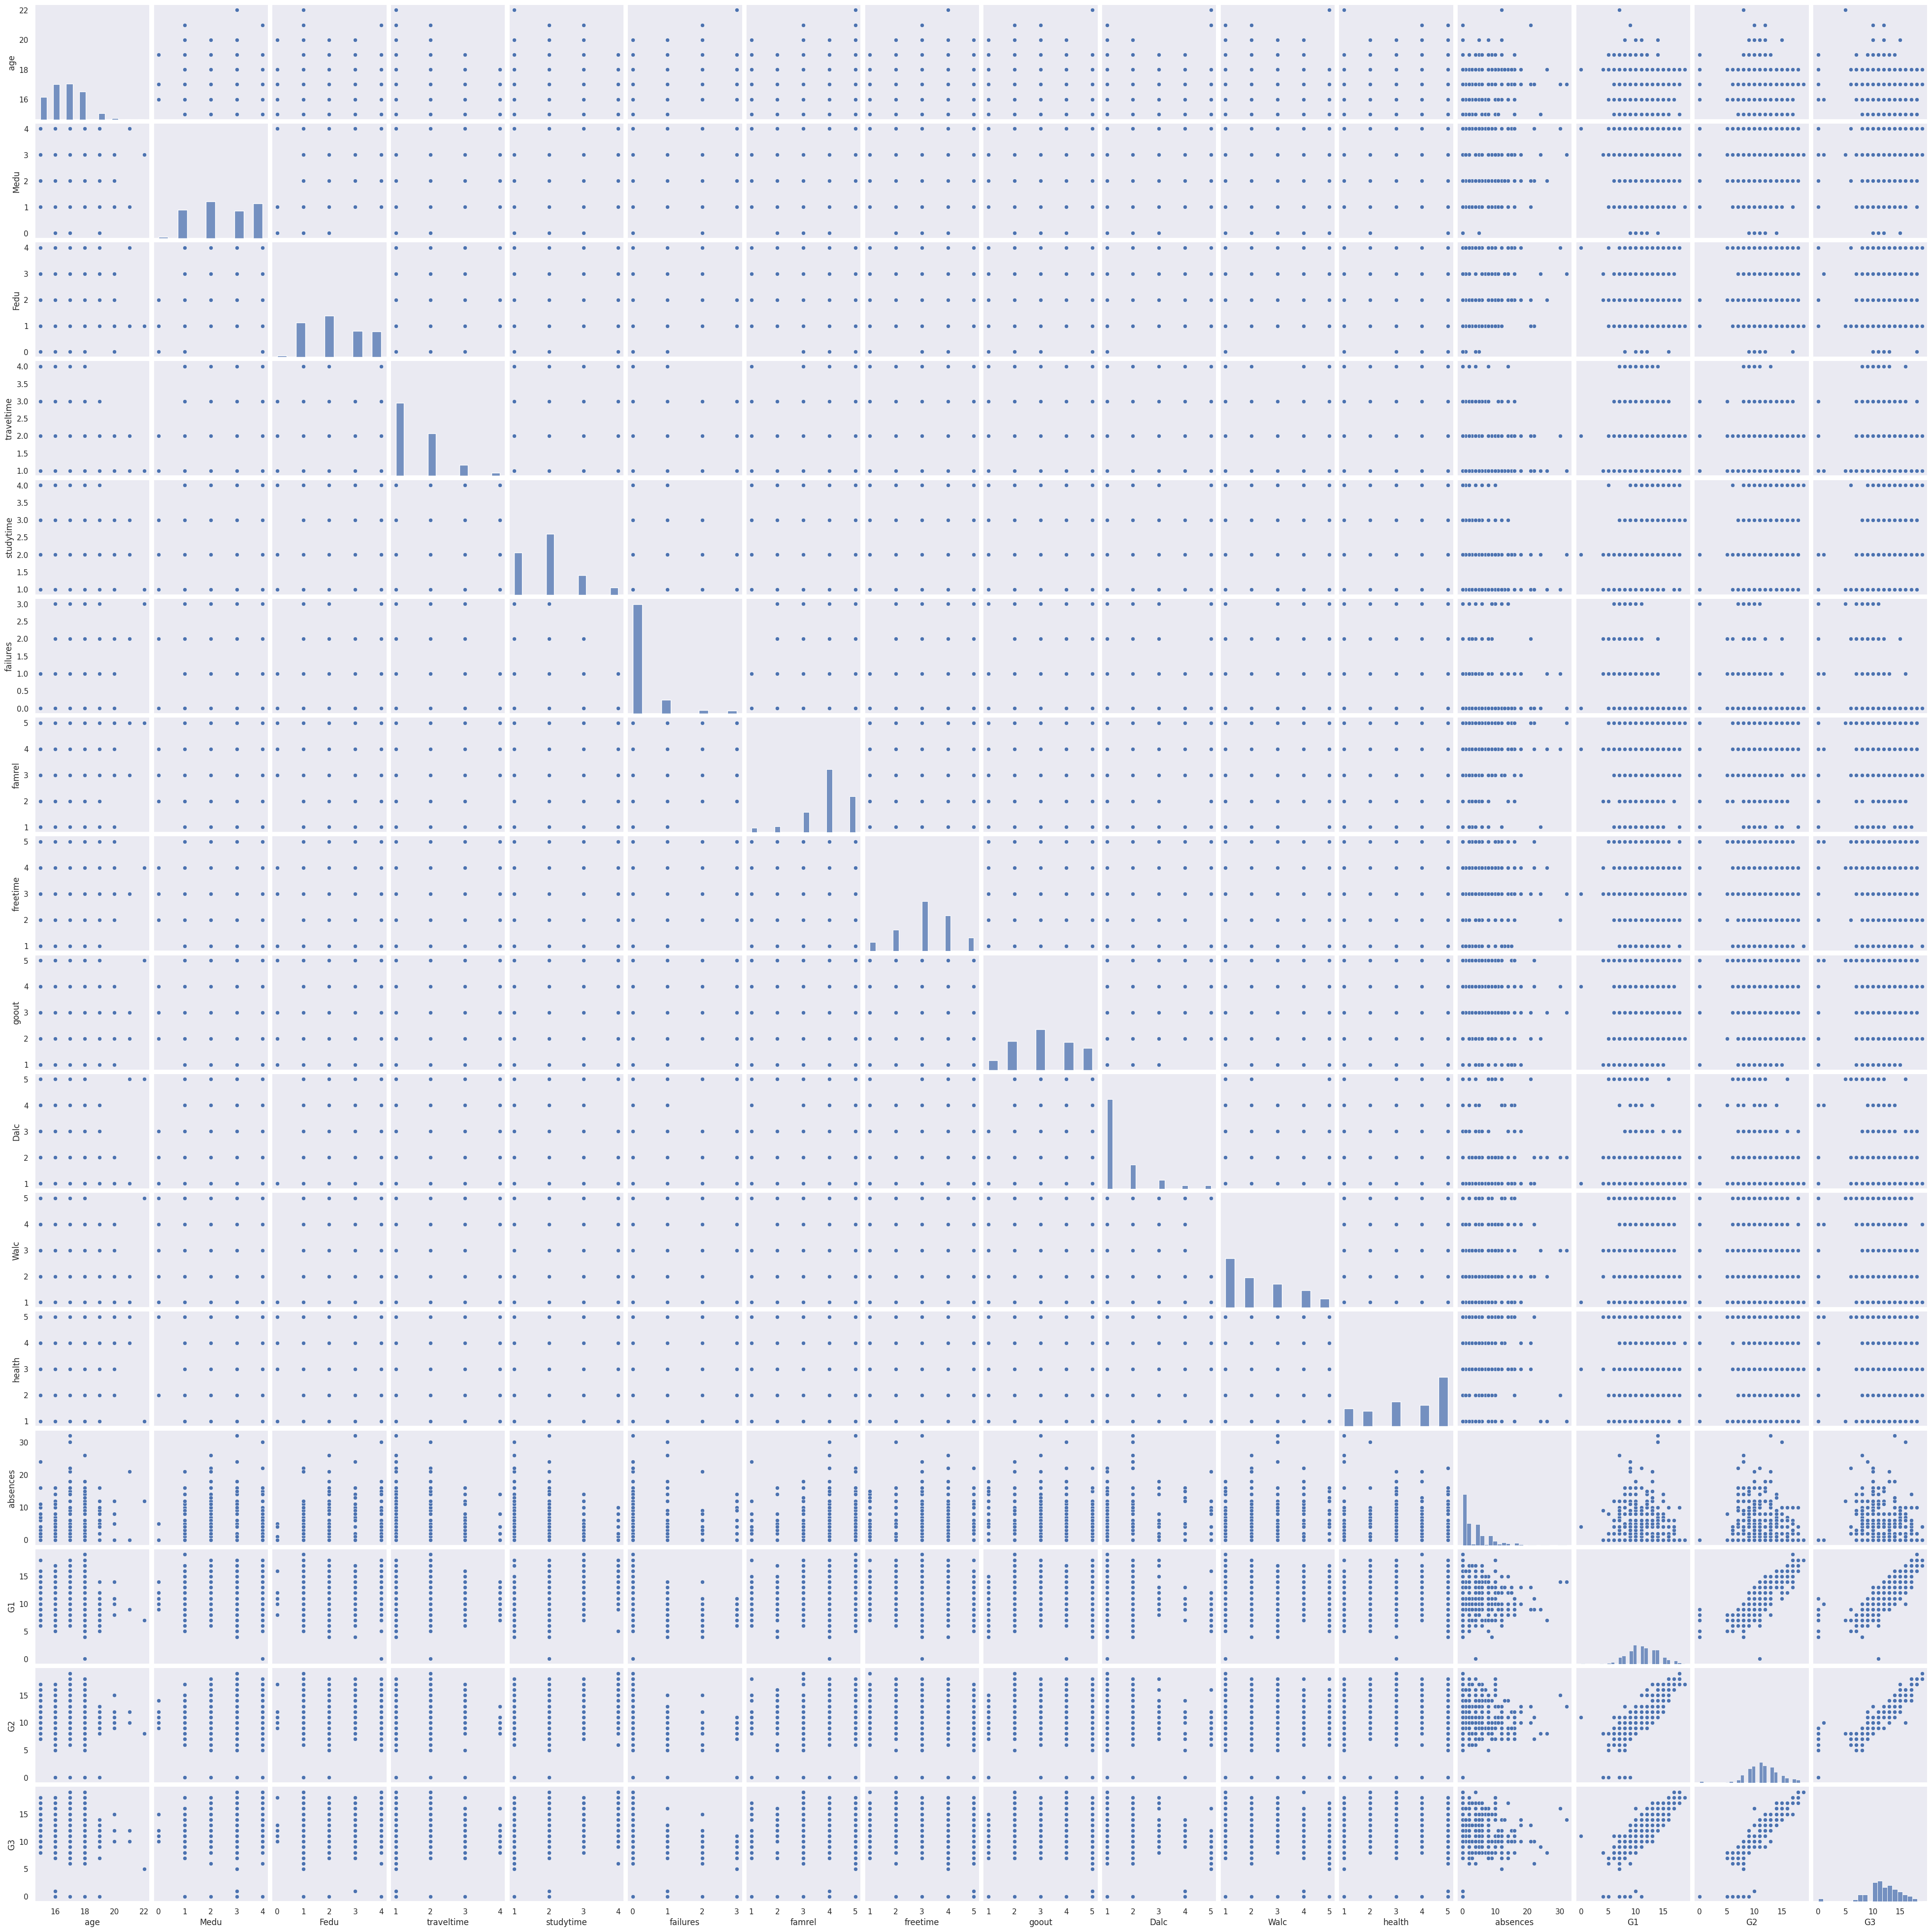

<Figure size 1000x1000 with 0 Axes>

In [92]:
sns.set(style='dark')
sns.pairplot(data1)
plt.figure(figsize=(10, 10))
plt.show()

<ipython-input-93-48efbb2a76f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data1.head().corr()


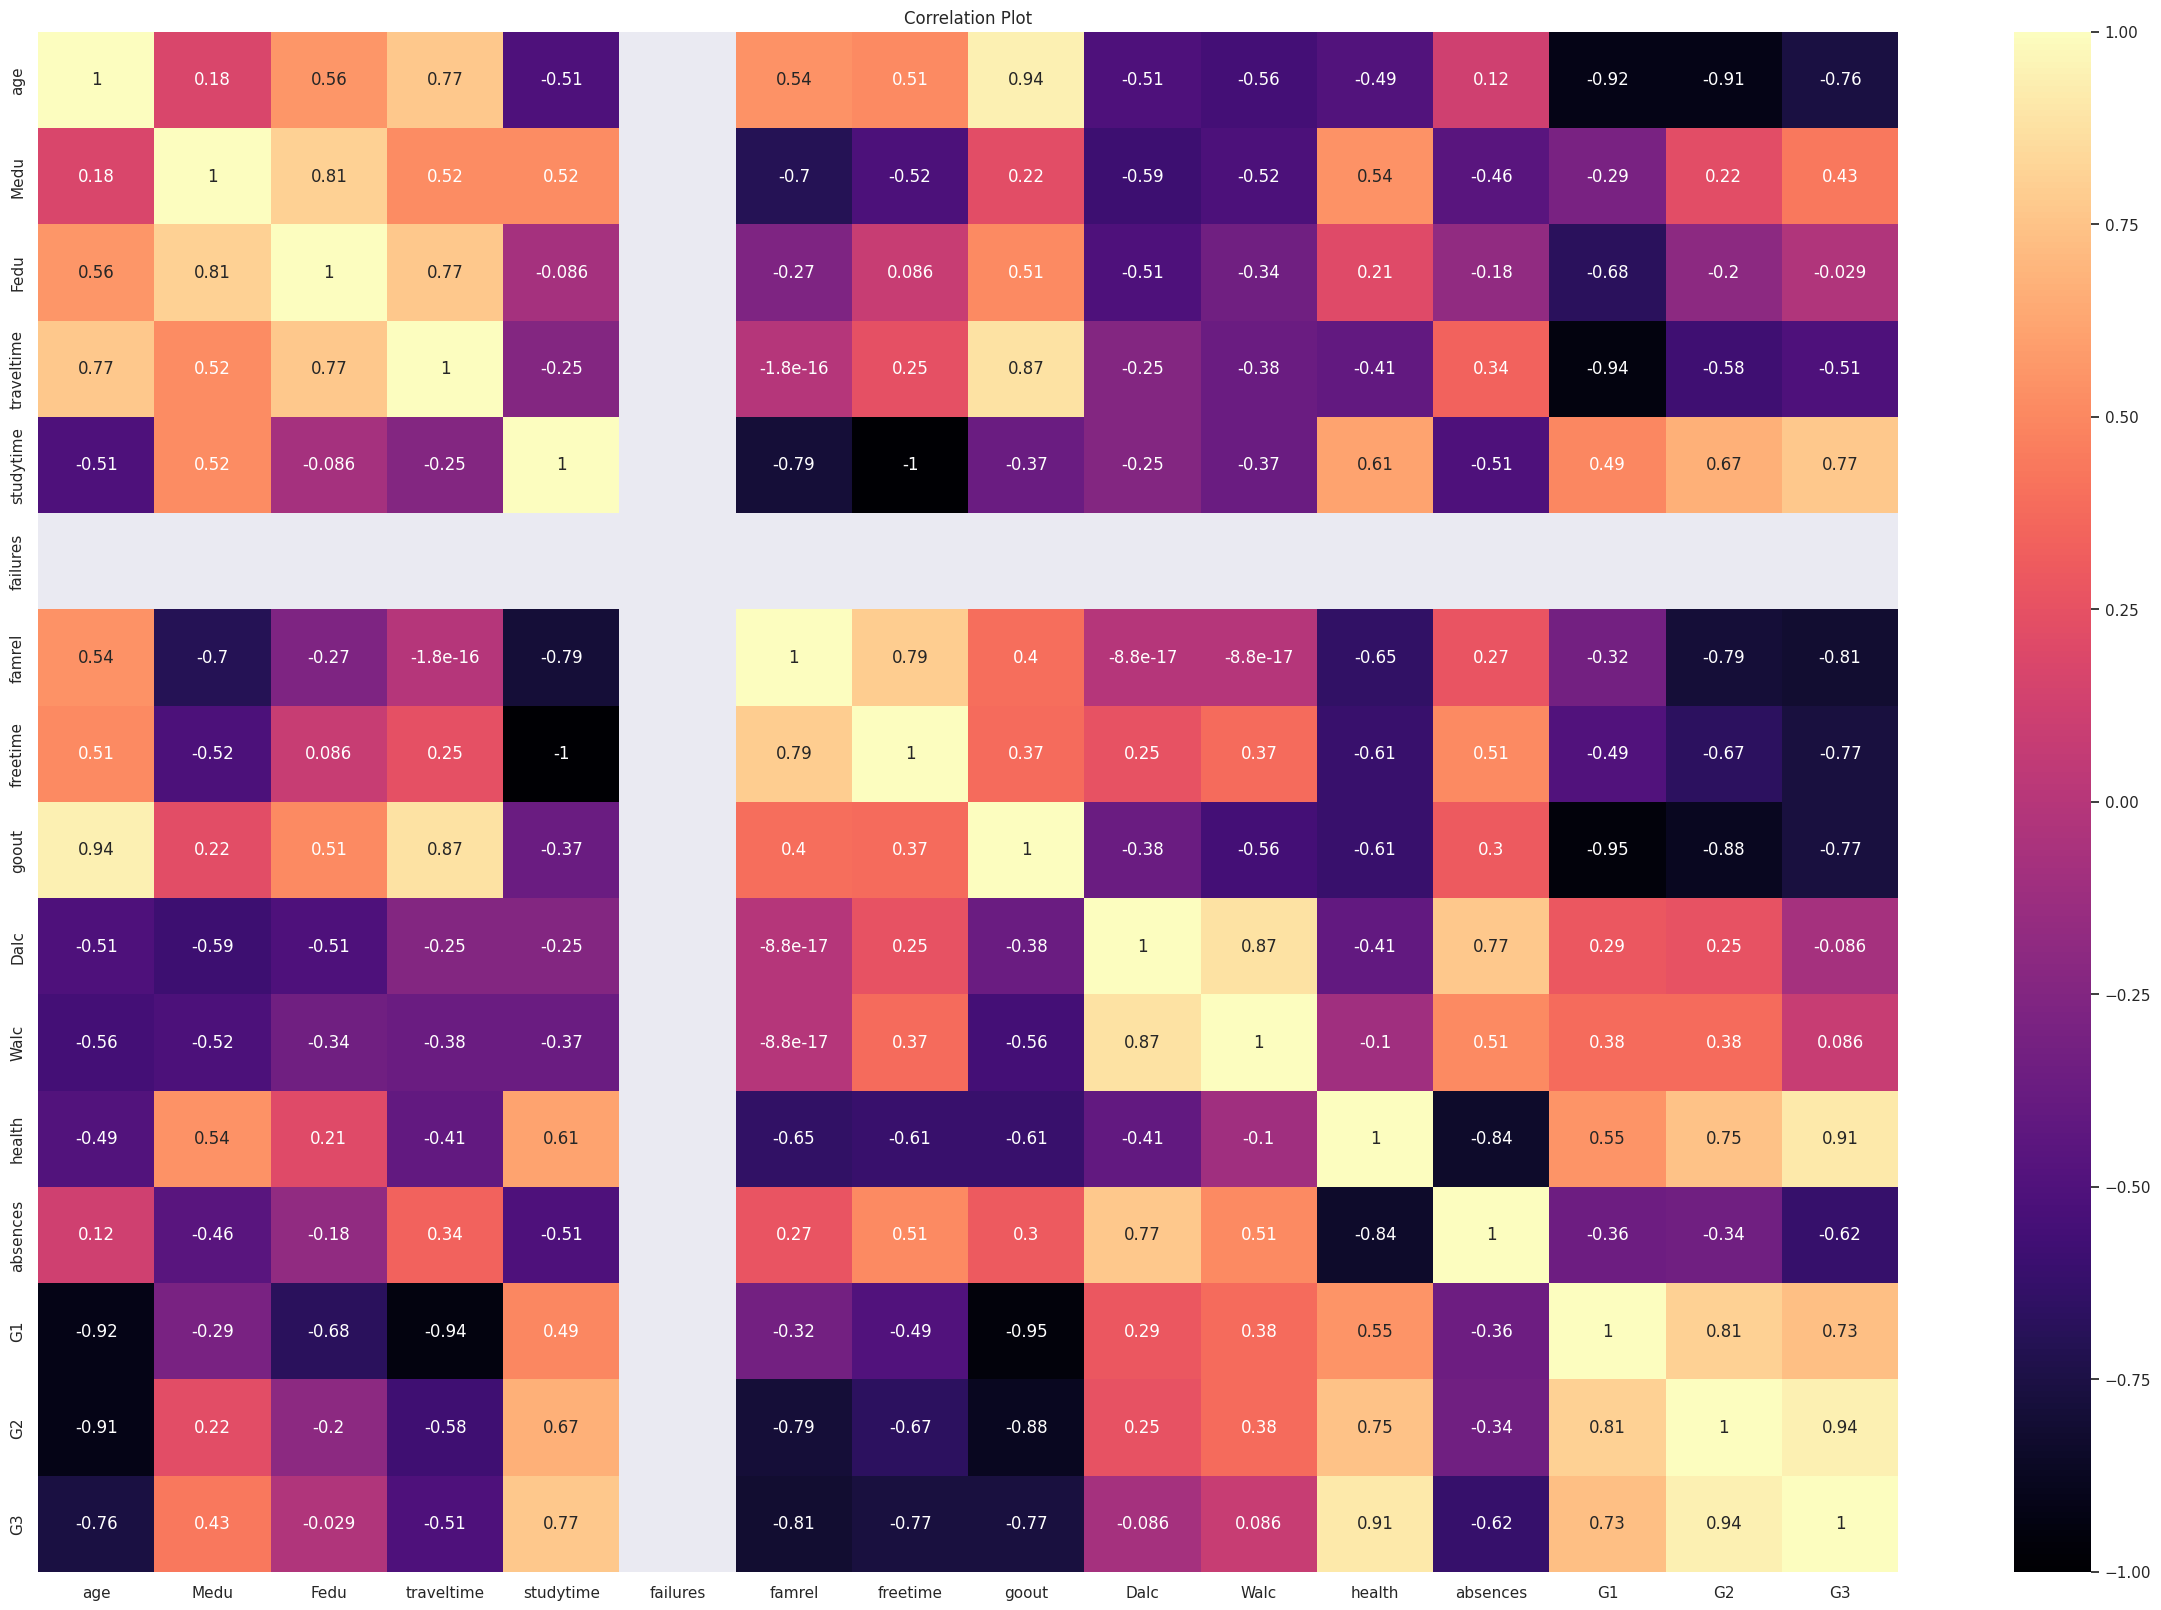

In [93]:

# Calculate the correlation matrix
correlation_matrix = data1.head().corr()

# Create the correlation plot using seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Plot')
plt.show()

In [94]:
print(data1.shape)

(649, 33)


In [95]:
columns_to_encode = ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    data1[column] = label_encoder.fit_transform(data1[column])

data1

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1    1   17        1        1        1     3     1     3     3  ...   
648       1    1   18        0        1        1     3     2     3     2  ...   

     famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0         4         3      4     1     1       3         4   0  11  11  
1         5         3      3     1     1       3         2   9  11  11  
2         4         3      2     2     3       3         6  12  13  12  
3         3         2      2     1     1       5         0  14  14  14  
4         4         3      2     1     2       5         0  11  13  13  
..      ...       ...    ...   ...   ...     ...       ...  ..  ..  ..  
644       5         4      2     1     2       5         4  10  11  10  
645       4         3      4     1     1       1         4  15  15  16  
646       1         1      1     1     1       5         6  11  12   9  
647       2         4      5     3     4       2         6  10  10  10  
648       4         4      1     3     4       5         4  10  11  11  

[649 rows x 33 columns]

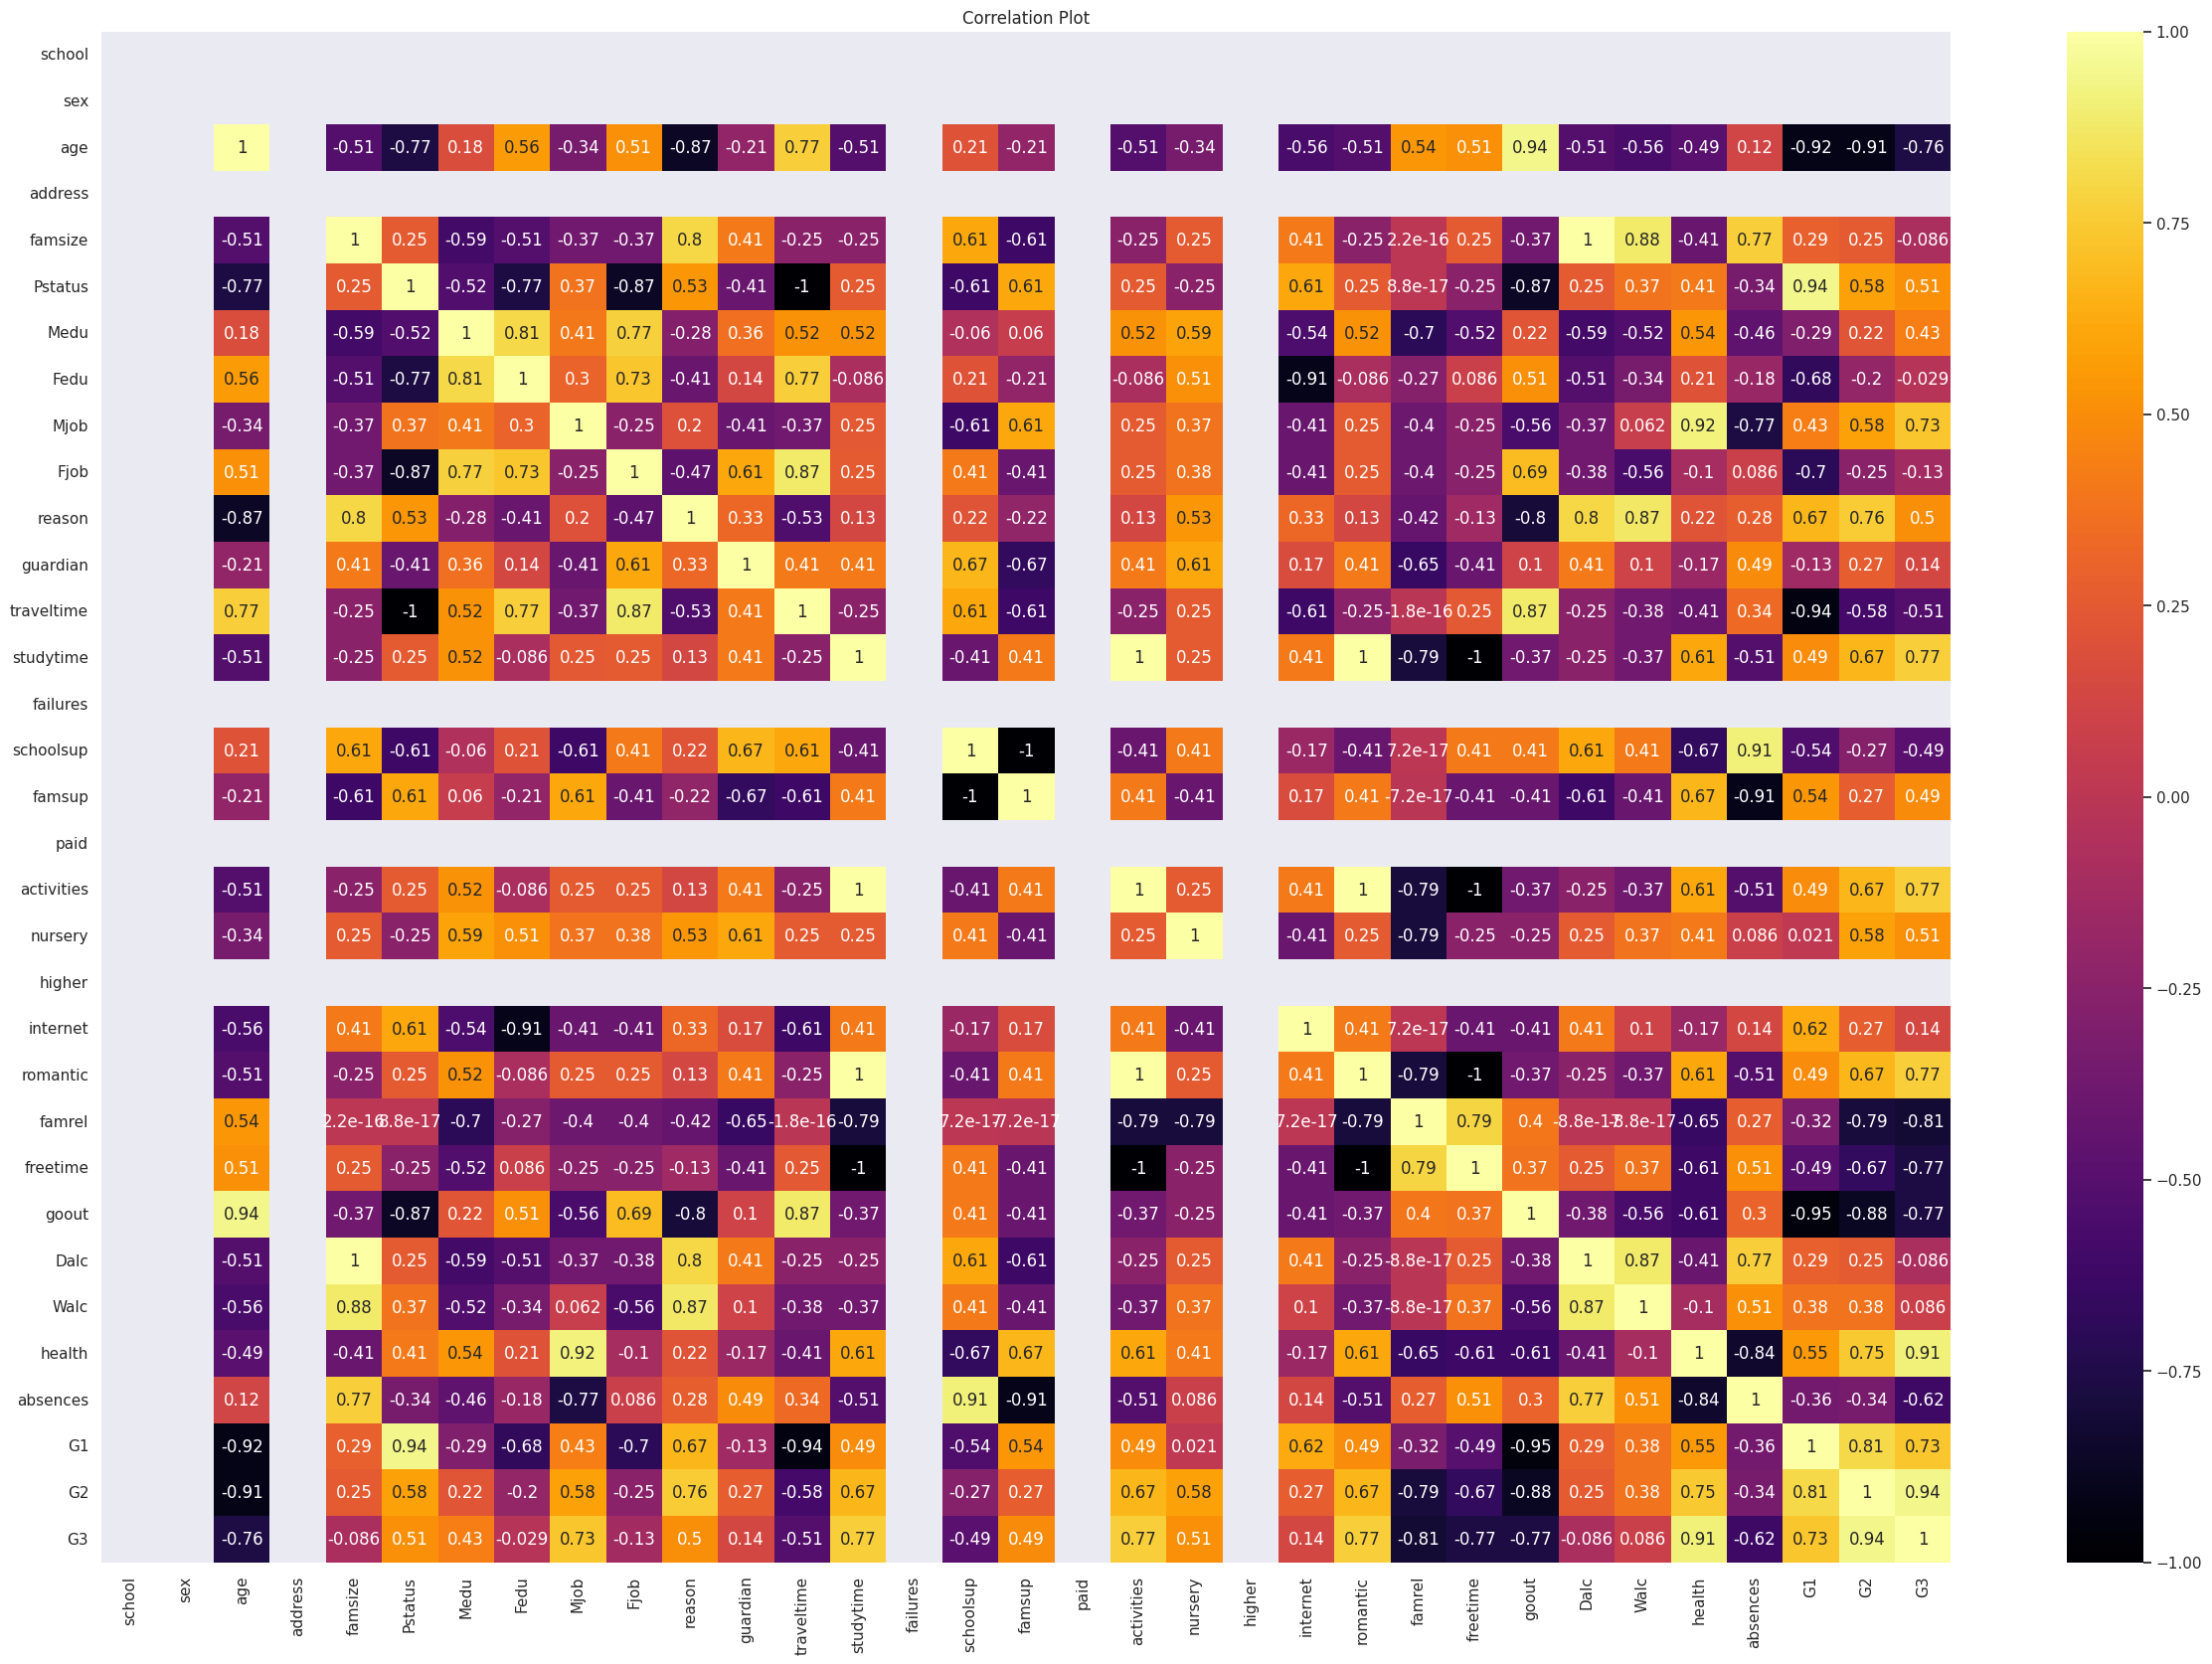

In [96]:
# Calculate the correlation matrix
correlation_matrix = data1.head().corr()

# Create the correlation plot using seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', vmin=-1, vmax=1)
plt.title('Correlation Plot')
plt.show()

In [97]:
sns.set(style='dark')
sns.pairplot(data1)

plt.show()

In [98]:
data1


school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1    1   17        1        1        1     3     1     3     3  ...   
648       1    1   18        0        1        1     3     2     3     2  ...   

     famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0         4         3      4     1     1       3         4   0  11  11  
1         5         3      3     1     1       3         2   9  11  11  
2         4         3      2     2     3       3         6  12  13  12  
3         3         2      2     1     1       5         0  14  14  14  
4         4         3      2     1     2       5         0  11  13  13  
..      ...       ...    ...   ...   ...     ...       ...  ..  ..  ..  
644       5         4      2     1     2       5         4  10  11  10  
645       4         3      4     1     1       1         4  15  15  16  
646       1         1      1     1     1       5         6  11  12   9  
647       2         4      5     3     4       2         6  10  10  10  
648       4         4      1     3     4       5         4  10  11  11  

[649 rows x 33 columns]

Mean Squared Error: 2.41


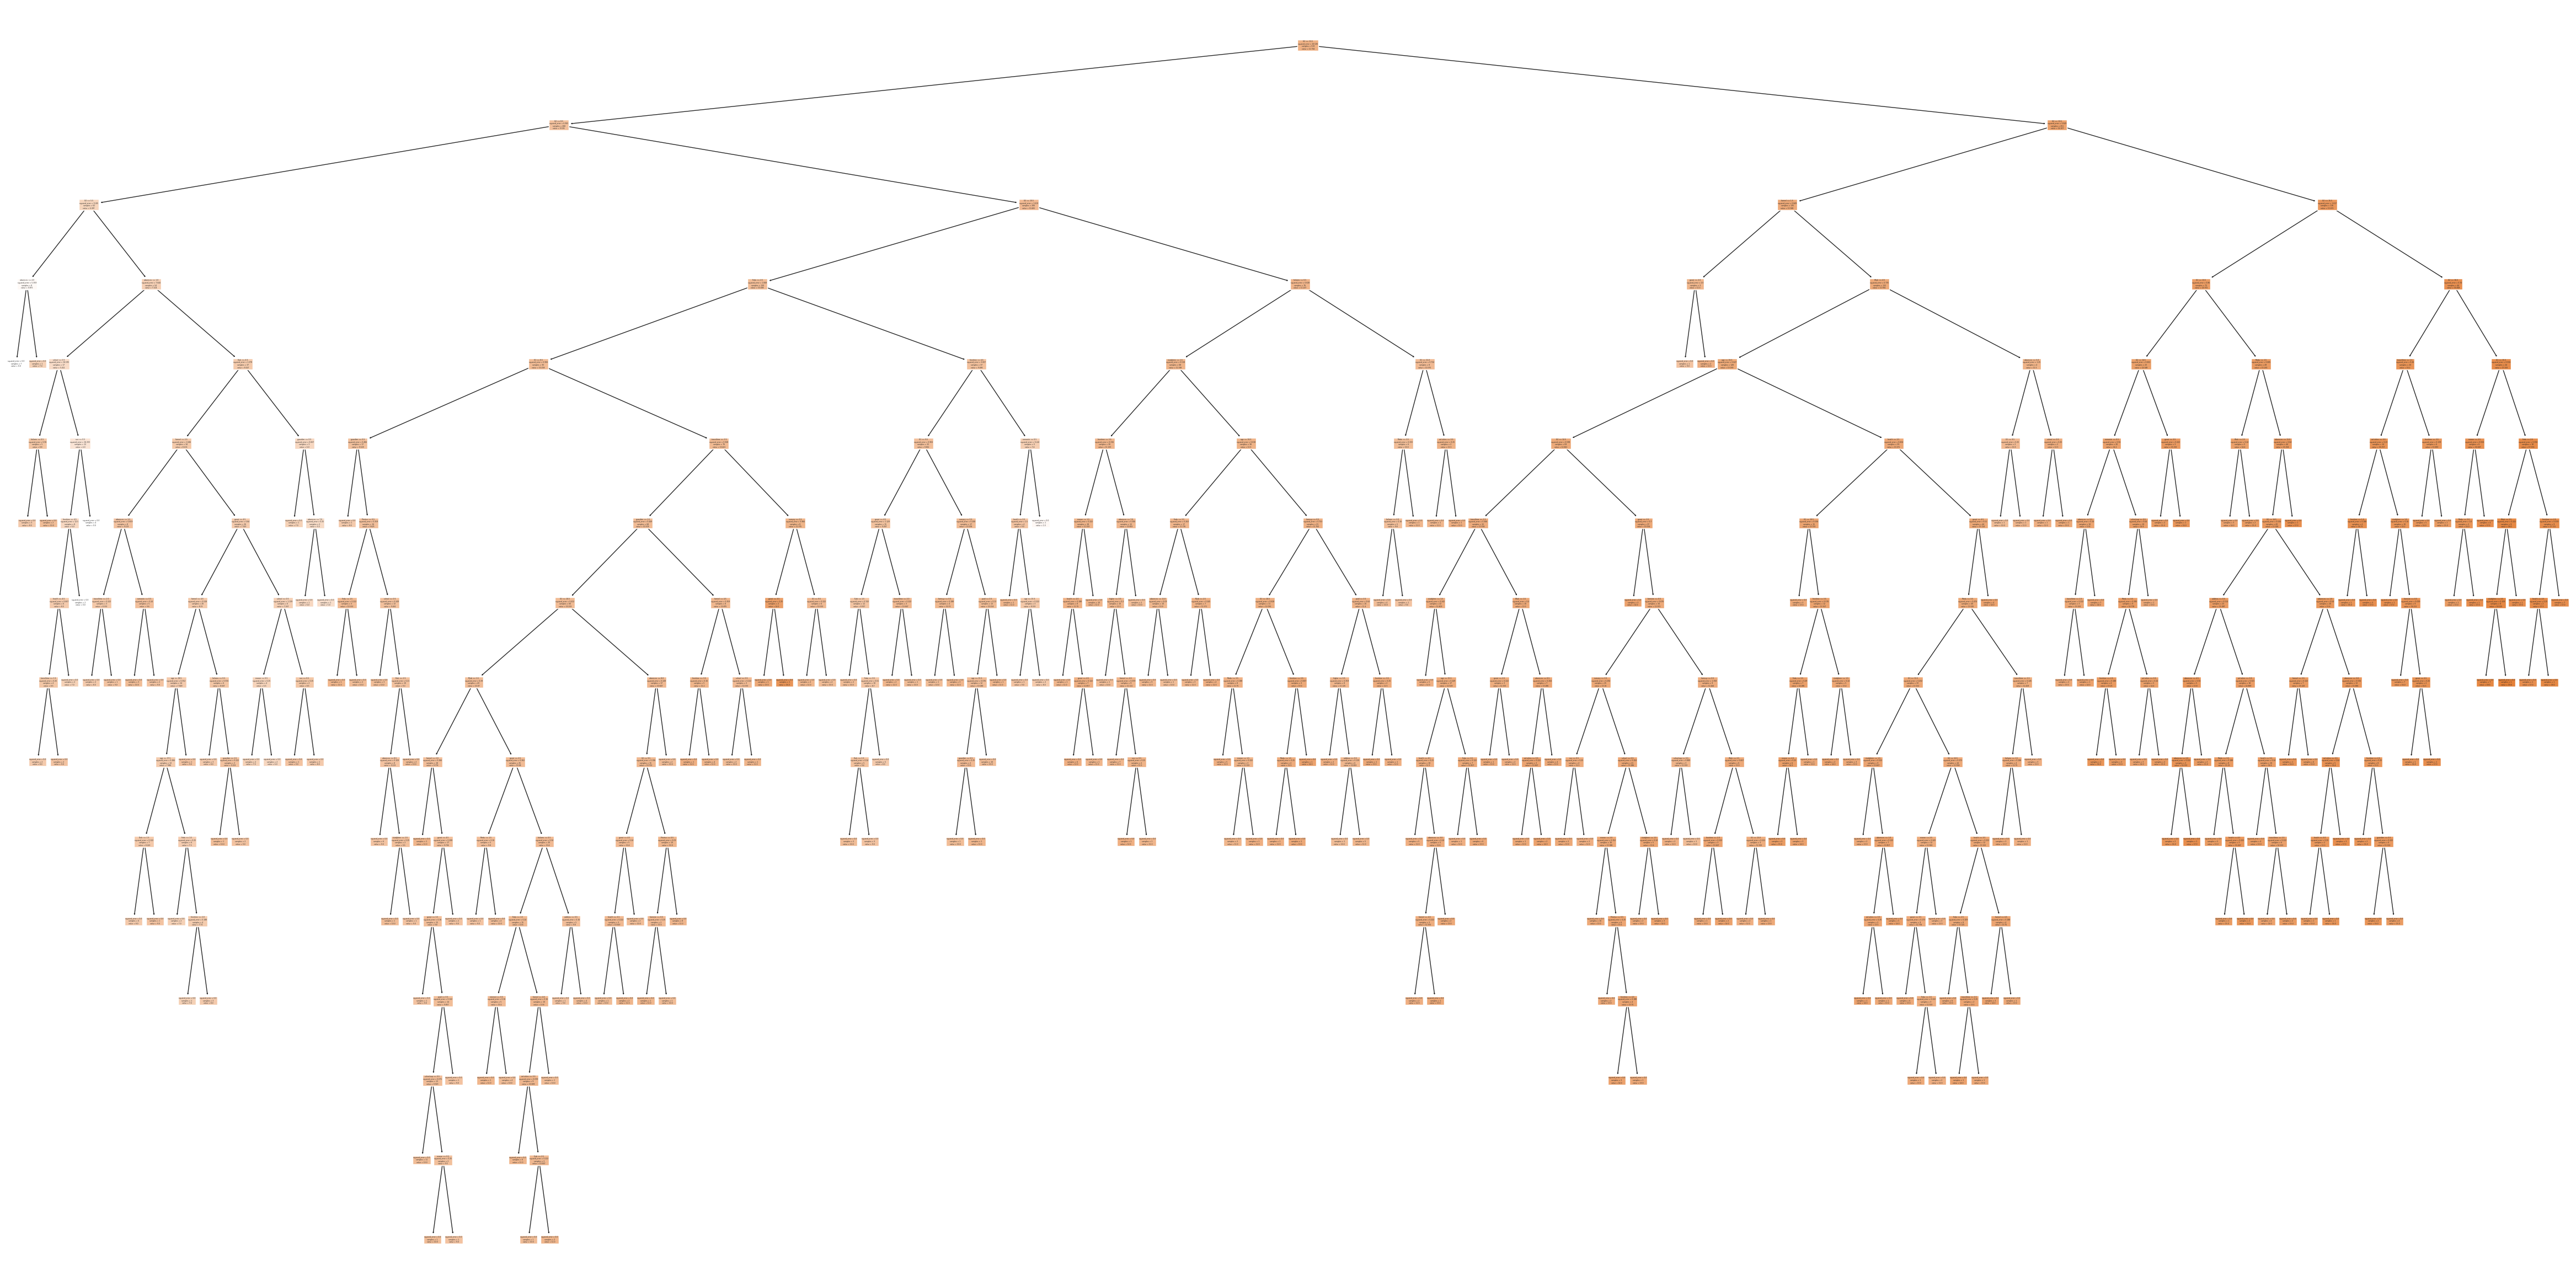

In [99]:
X = data1.drop('G3', axis=1)
y = data1['G3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt_reg = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_dt_reg)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize the decision tree
plt.figure(figsize=(60, 30))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()



Mean Squared Error: 1.44


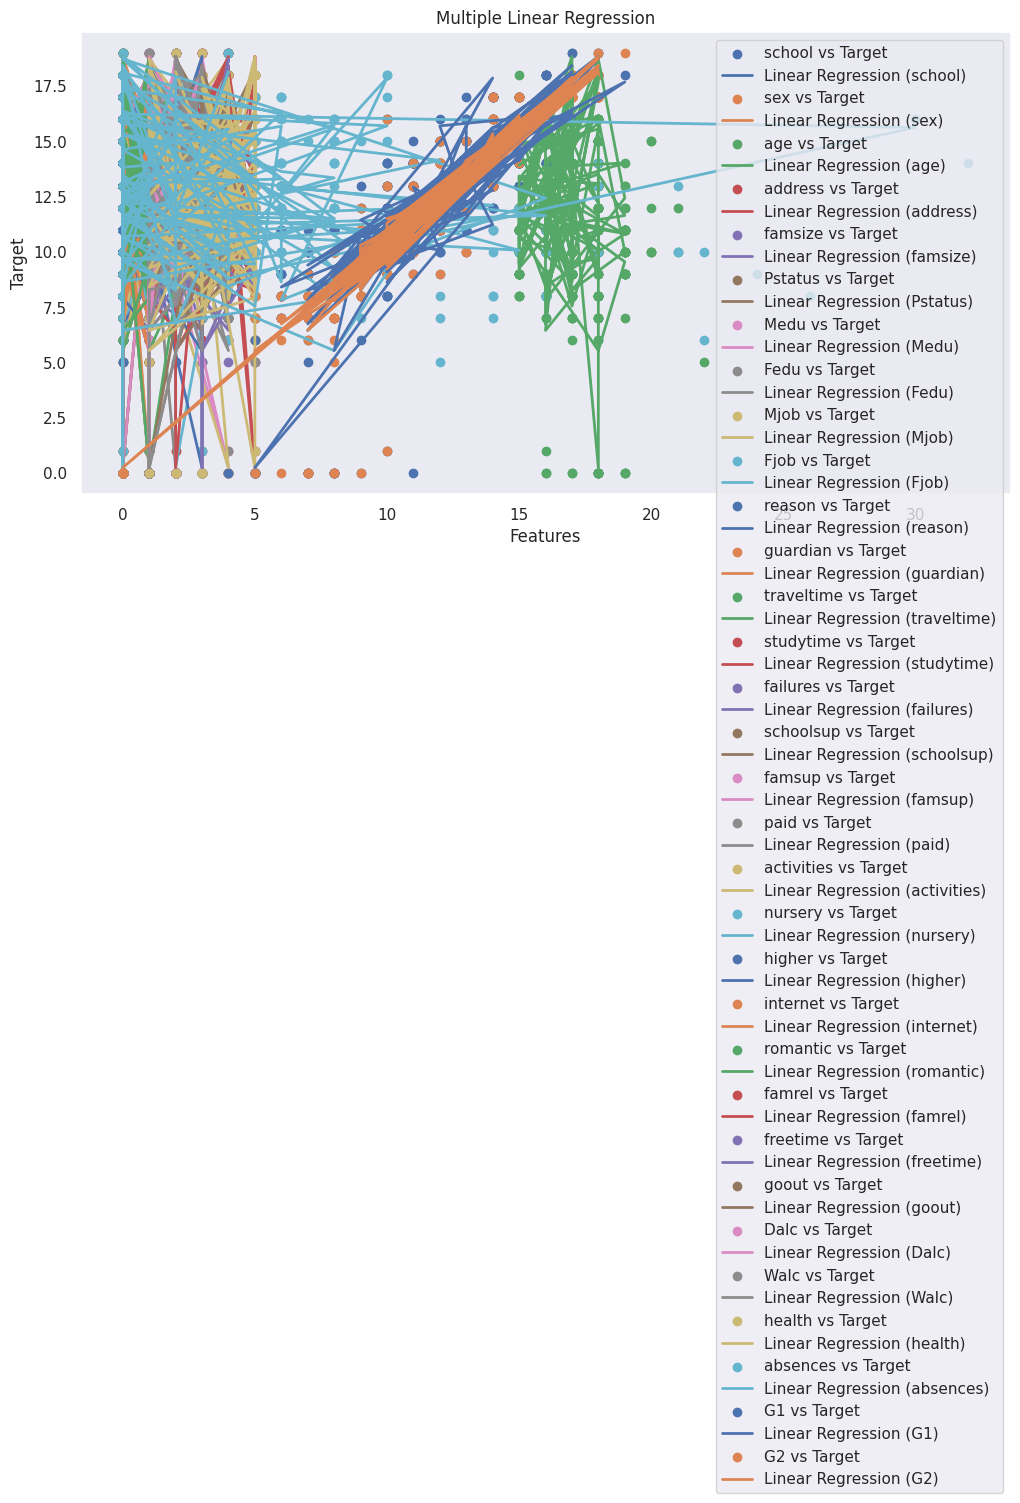

In [100]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize the linear regression line and data points for each feature
plt.figure(figsize=(12, 6))

for column in X.columns:
    plt.scatter(X[column], y, label=f'{column} vs Target')
    plt.plot(X_test[column], y_pred_linear, linewidth=2, label=f'Linear Regression ({column})')

plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()


In [101]:

# # Prediction system
# new_data = {
#     'Feature1': [6.7, 8.8],
#     'Feature2': [5.4, 6.1],
#     'Feature3': [4.2, 3.9]
# }

# new_df = pd.DataFrame(new_data)

# # Make predictions on new data
# new_predictions = model.predict(new_df)

# print('Predicted Values for New Data:')
# for i, prediction in enumerate(new_predictions):
#     print(f'Prediction {i + 1}: {prediction:.2f}')

ValueError: ignored

In [102]:
data1.head(5)


school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11  11  
1       5         3      3     1     1       3         2   9  11  11  
2       4         3      2     2     3       3         6  12  13  12  
3       3         2      2     1     1       5         0  14  14  14  
4       4         3      2     1     2       5         0  11  13  13  

[5 rows x 33 columns]

In [103]:
data1['Label'] = data1['G3'].apply(lambda x: '1' if x > 10 else '0')
data1.head(5)


school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  Label  
0         3      4     1     1       3         4   0  11  11      1  
1         3      3     1     1       3         2   9  11  11      1  
2         3      2     2     3       3         6  12  13  12      1  
3         2      2     1     1       5         0  14  14  14      1  
4         3      2     1     2       5         0  11  13  13      1  

[5 rows x 34 columns]

In [105]:
data1.shape

(649, 34)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


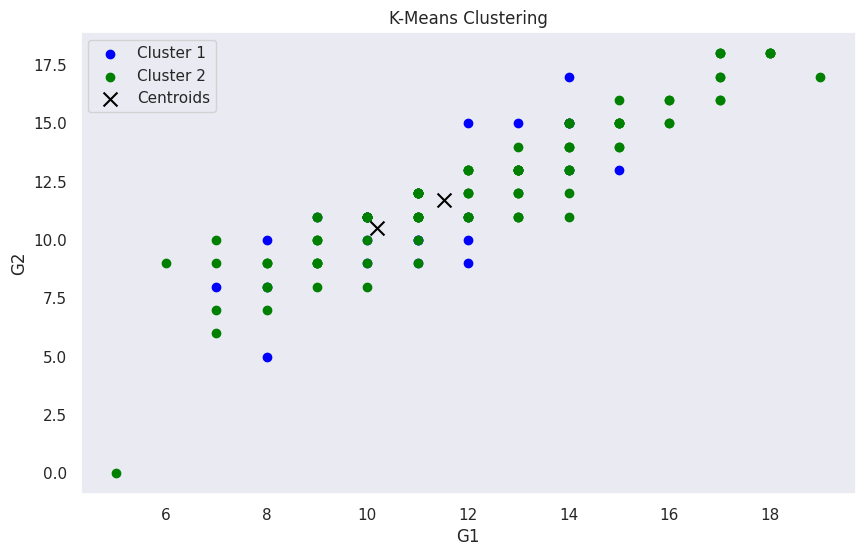

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Separate features and labels
X = data1.drop(['Label','G3'], axis=1)
y = data1['Label']


# Initialize the KMeans clustering model
n_clusters = 2  # Number of clusters
model = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans on the training data
model.fit(X_train)

# Predict clusters on the test data
cluster_preds = model.predict(X_test)

# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
for cluster_id in range(n_clusters):
    plt.scatter(X_test[cluster_preds == cluster_id]['G1'],
                X_test[cluster_preds == cluster_id]['G2'],
                color=colors[cluster_id], label=f'Cluster {cluster_id + 1}')
plt.scatter(model.cluster_centers_[:, 30], model.cluster_centers_[:, 31], color='black', marker='x', s=100, label='Centroids')
plt.xlabel('G1')
plt.ylabel('G2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# # Prediction system based on cluster centroids
# def predict_cluster(data_point):
#     cluster_id = model.predict([data_point])[0]
#     return cluster_id

# # New data points for prediction
# new_data = [
#     [3.0, 2.5],
#     [8.0, 6.0]
# ]

# # Make predictions on new data points
# for i, data_point in enumerate(new_data):
#     cluster_id = predict_cluster(data_point)
#     print(f'Predicted Cluster for Data Point {i + 1}: Cluster {cluster_id + 1}')

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Separate features and labels
X = data1.drop(['Label','G3'], axis=1)
y = data1['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
k = 11  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

# # Visualize the decision boundary (for two features)
# if X_train.shape[1] == 2:
#     h = 0.01  # Step size in the mesh
#     x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
#     y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     plt.figure(figsize=(10, 6))
#     plt.contourf(xx, yy, Z, alpha=0.4)
#     plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
#     plt.xlabel('Feature1')
#     plt.ylabel('Feature2')
#     plt.title('K-Nearest Neighbors Decision Boundary')
#     plt.show()


Accuracy: 0.89


In [108]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
k = 94  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Confusion Matrix:
[[24  8]
 [ 3 95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.92      0.97      0.95        98

    accuracy                           0.92       130
   macro avg       0.91      0.86      0.88       130
weighted avg       0.91      0.92      0.91       130



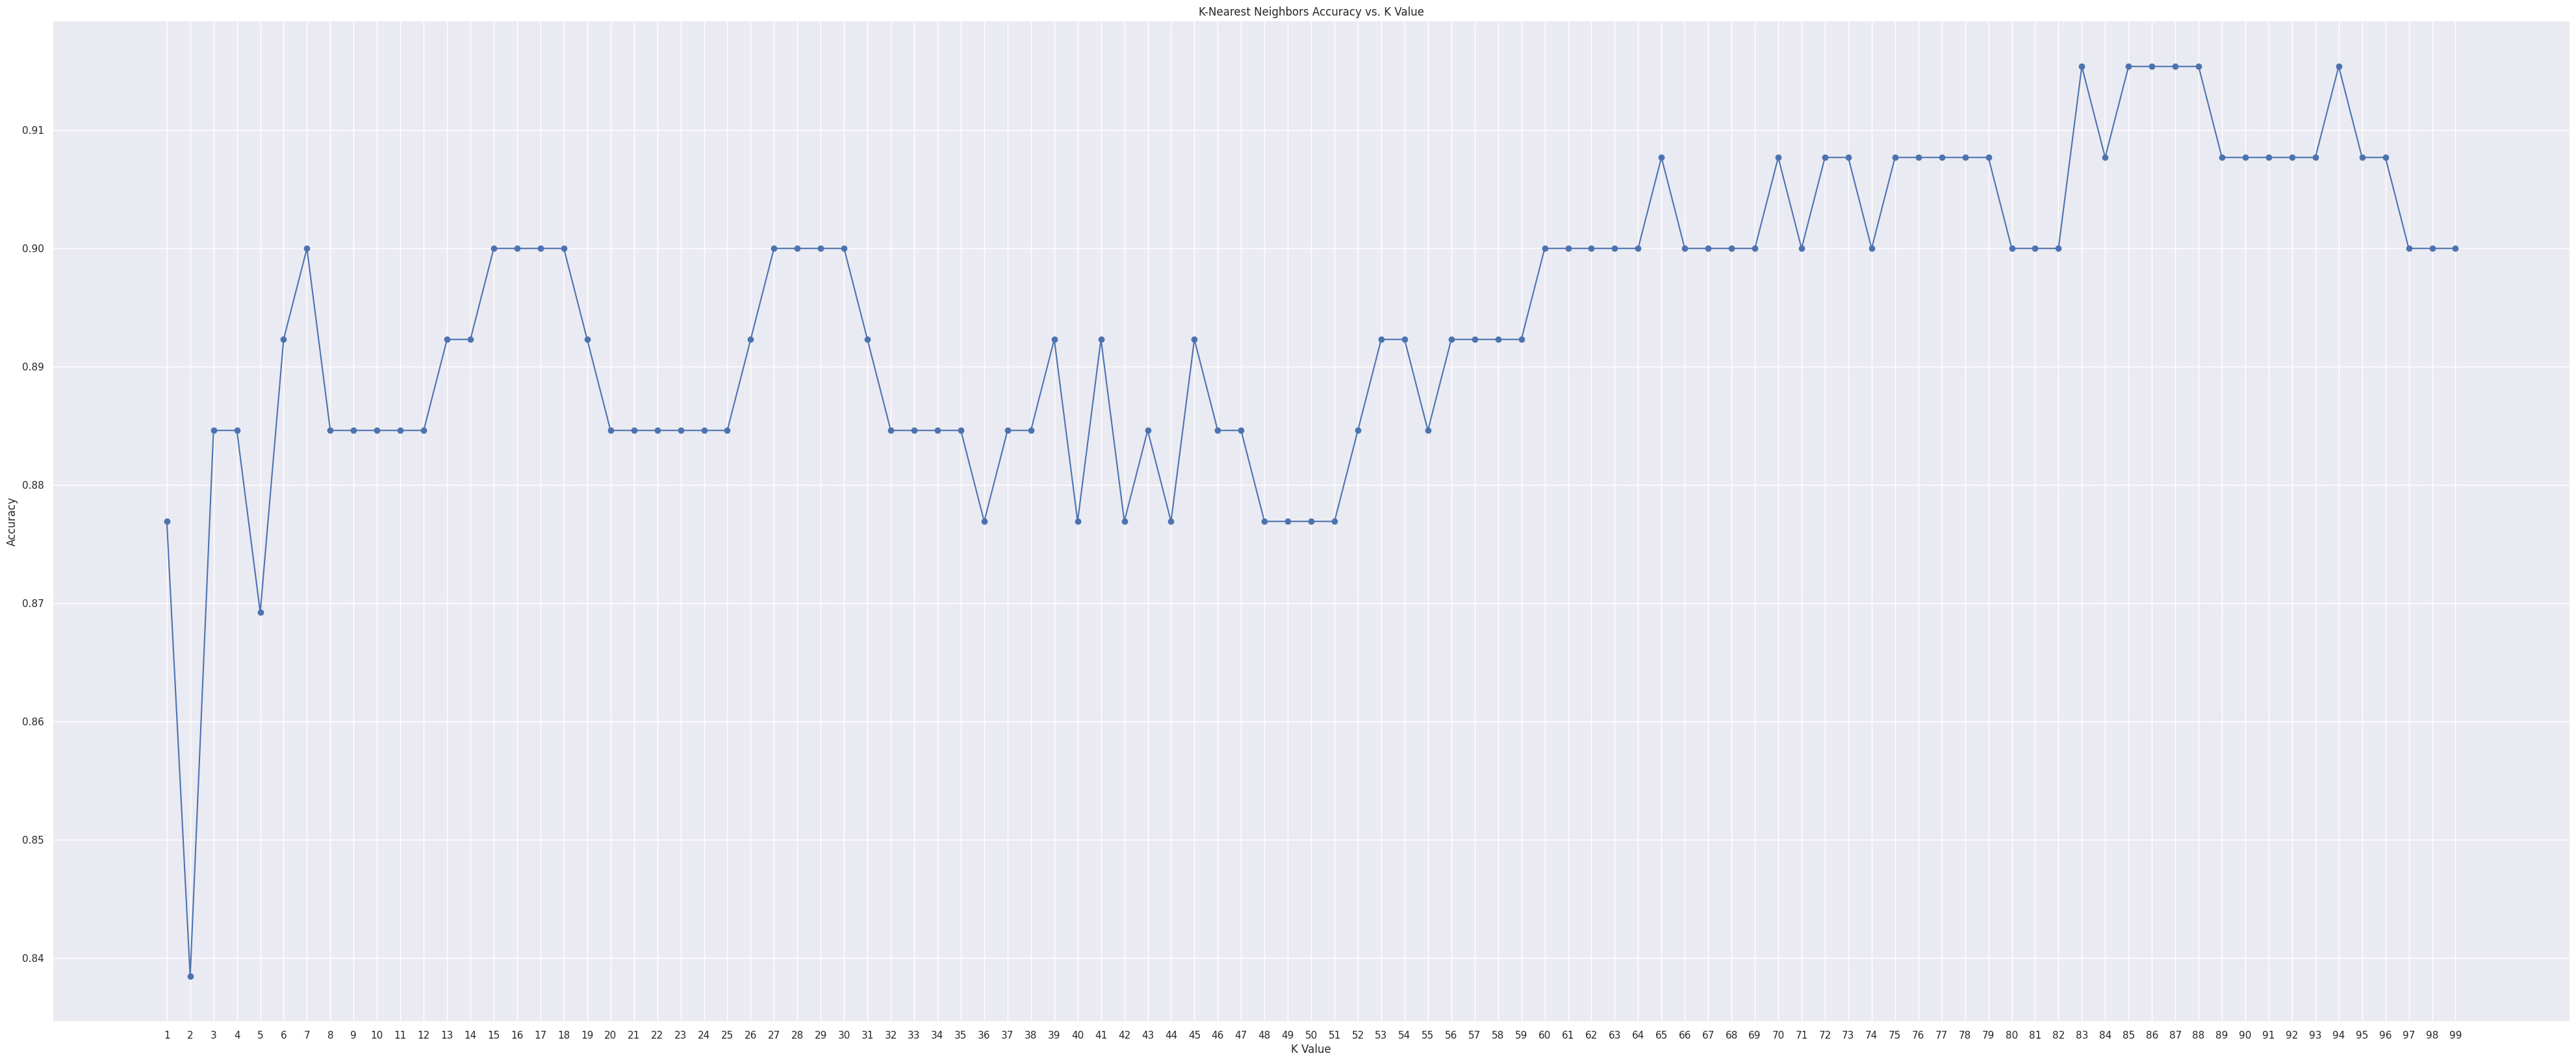

In [110]:
# Initialize lists to store K values and corresponding accuracies
k_values = []
accuracies = []

# Test different K values
for k in range(1, 100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the relationship between K values and accuracies
plt.figure(figsize=(50, 20))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-Nearest Neighbors Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error



df = pd.read_csv("student-por.csv")
columns_to_encode = ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Separate features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a deep neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.1)

# Evaluate the model on the test data
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss (MSE): {loss:.2f}')

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate R-squared (coefficient of determination)
r_squared = 1 - (mse / np.var(y_test))
print(f'R-squared (coefficient of determination): {r_squared:.2f}')


# # Make predictions
# sample_data = np.array([[21, 6, 88]])
# sample_data_scaled = scaler.transform(sample_data)
# predicted_performance = model.predict(sample_data_scaled)[0][0]
# print(f'Predicted Performance: {predicted_performance:.2f}')


Epoch 1/50
59/59 [==============================] - 1s 5ms/step - loss: 132.4487 - val_loss: 118.7014
Epoch 2/50
59/59 [==============================] - 0s 3ms/step - loss: 87.7487 - val_loss: 62.2130
Epoch 3/50
59/59 [==============================] - 0s 3ms/step - loss: 40.0237 - val_loss: 18.1664
Epoch 4/50
59/59 [==============================] - 0s 3ms/step - loss: 20.1882 - val_loss: 8.4902
Epoch 5/50
59/59 [==============================] - 0s 3ms/step - loss: 16.8732 - val_loss: 5.7362
Epoch 6/50
59/59 [==============================] - 0s 3ms/step - loss: 14.7233 - val_loss: 4.3268
Epoch 7/50
59/59 [==============================] - 0s 3ms/step - loss: 14.1165 - val_loss: 4.1280
Epoch 8/50
59/59 [==============================] - 0s 3ms/step - loss: 13.7836 - val_loss: 4.8391
Epoch 9/50
59/59 [==============================] - 0s 3ms/step - loss: 14.0004 - val_loss: 3.7458
Epoch 10/50
59/59 [==============================] - 0s 3ms/step - loss: 12.4518 - val_loss: 3.4539
Epoc

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("student-por.csv")

# Separate features and target
X = df.drop(['Label','G3'], axis=1)
y = df['Label']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a deep neural network model for classification
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

y_test_labels = label_encoder.inverse_transform(y_test)

# Calculate classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))


KeyError: ignored

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error



df=pd.read_csv("student-por.csv")
columns_to_encode = ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


df['Label'] = df['G3'].apply(lambda x: '1' if x > 10 else '0')

# Separate features and targets
X = df.drop(['Label', 'G3'], axis=1)
y_category = df['Label']
y_value = df['G3']

# Encode the target labels
label_encoder = LabelEncoder()
y_category_encoded = label_encoder.fit_transform(y_category)

# Split data into training and testing sets
X_train, X_test, y_train_category, y_test_category, y_train_value, y_test_value = train_test_split(
    X, y_category_encoded, y_value, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine (SVM) for classification
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train_category)
y_pred_category_svm = svm_classifier.predict(X_test_scaled)

# Random Forest Classifier for classification
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train_category)
y_pred_category_rf = rf_classifier.predict(X_test_scaled)

# Random Forest Regression for regression
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_scaled, y_train_value)
y_pred_value_rf = rf_regressor.predict(X_test_scaled)

# Calculate and display accuracy for classification
accuracy_svm = accuracy_score(y_test_category, y_pred_category_svm)
accuracy_rf = accuracy_score(y_test_category, y_pred_category_rf)

print("Classification Results:")
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")

# Calculate and display Mean Squared Error (MSE) for regression
mse_rf = mean_squared_error(y_test_value, y_pred_value_rf)
print("\nRegression Results:")
print(f"Random Forest Regression MSE: {mse_rf:.2f}")


Classification Results:
SVM Accuracy: 0.86
Random Forest Classifier Accuracy: 0.91

Regression Results:
Random Forest Regression MSE: 1.64


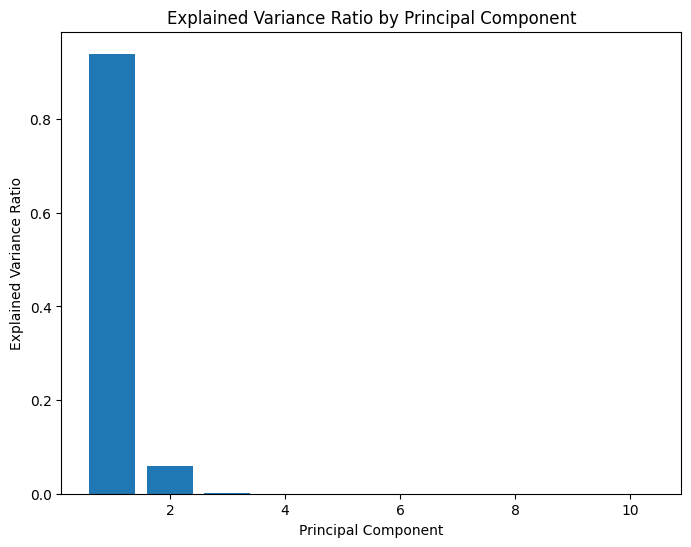

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample data (replace this with your own dataset)
data = {
    'feature1': [1.2, 2.3, 3.4, 4.5, 5.6, 8.1, 9.2, 10.3, 11.4, 12.5],
    'feature2': [0.8, 1.5, 2.7, 3.9, 4.2, 7.0, 6.2, 5.4, 4.7, 3.1],
    'feature3': [2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 9.0, 10.1, 11.2],
    'feature4': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'feature5': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
    'feature6': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'feature7': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'feature8': [3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, -0.5, -1.0],
    'feature9': [7, 14, 21, 28, 35, 42, 49, 56, 63, 70],
    'feature10': [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5],
}

df = pd.DataFrame(data)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# You can now use the transformed data (X_pca) for further analysis or modeling.
# For example, you can use the top principal components for clustering or classification tasks.


In [15]:
explained_variance_ratio

array([9.40038948e-001, 5.88922239e-002, 7.52136969e-004, 3.16691344e-004,
       2.39015027e-034, 3.09278481e-036, 4.21826843e-067, 1.70676012e-068,
       1.26606991e-100, 1.43449489e-137])

Principal Component Names and Explained Variance Ratios:
school: Explained Variance Ratio = 0.39
sex: Explained Variance Ratio = 0.29
age: Explained Variance Ratio = 0.04
address: Explained Variance Ratio = 0.03
famsize: Explained Variance Ratio = 0.03
Pstatus: Explained Variance Ratio = 0.02
Medu: Explained Variance Ratio = 0.02
Fedu: Explained Variance Ratio = 0.02
Mjob: Explained Variance Ratio = 0.02
Fjob: Explained Variance Ratio = 0.02
reason: Explained Variance Ratio = 0.01
guardian: Explained Variance Ratio = 0.01
traveltime: Explained Variance Ratio = 0.01
studytime: Explained Variance Ratio = 0.01
failures: Explained Variance Ratio = 0.01
schoolsup: Explained Variance Ratio = 0.01
famsup: Explained Variance Ratio = 0.01
paid: Explained Variance Ratio = 0.01
activities: Explained Variance Ratio = 0.00
nursery: Explained Variance Ratio = 0.00
higher: Explained Variance Ratio = 0.00
internet: Explained Variance Ratio = 0.00
romantic: Explained Variance Ratio = 0.00
famrel: Expla

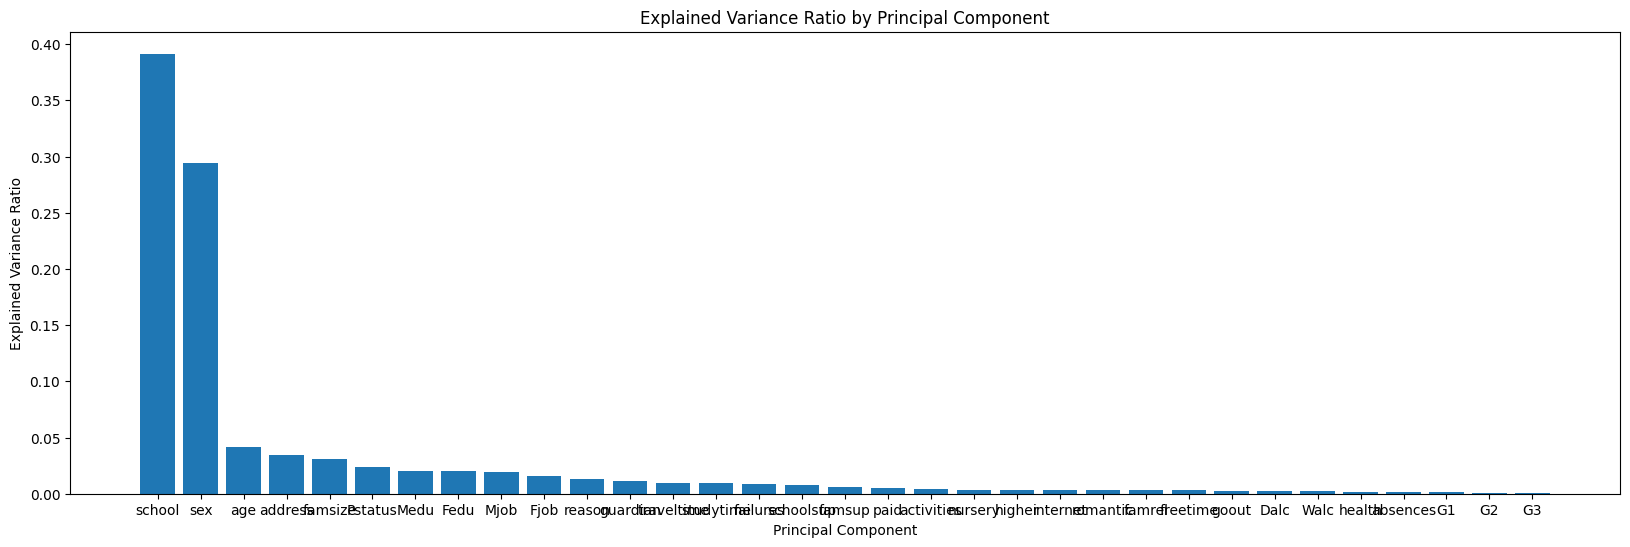

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample data (replace this with your own dataset)
df=pd.read_csv("student-por.csv")
columns_to_encode = ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Principal component names
component_names = df.columns

# Print principal component names and explained variance ratios
print("Principal Component Names and Explained Variance Ratios:")
for name, evr in zip(component_names, explained_variance_ratio):
    print(f'{name}: Explained Variance Ratio = {evr:.2f}')

# Visualize explained variance ratio
plt.figure(figsize=(20, 6))
plt.bar(component_names, explained_variance_ratio, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# You can now use the transformed data (X_pca) for further analysis or modeling.
# For example, you can use the top principal components for clustering or classification tasks.


In [22]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.5 MB/s eta 0:00:00


In [32]:
from transformers import pipeline

model_checkpoint = "consciousAI/question-answering-roberta-base-s-v2"

context = """
🤗 Transformers is backed by the three most popular deep learning libraries — Jax, PyTorch and TensorFlow — with a seamless integration
between them. It's straightforward to train your models with one before loading them for inference with the other.Deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning. The adjective "deep" in deep learning refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.[2]

Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.[3][4][5]

Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains. Specifically, artificial neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic (plastic) and analog.[6][7]
"""
question = "Which deep learning libraries back 🤗 Transformers?"

question_answerer = pipeline("question-answering", model=model_checkpoint)
question_answerer(question=question, context=context)

{'score': 0.999548614025116,
 'start': 78,
 'end': 105,
 'answer': 'Jax, PyTorch and TensorFlow'}

In [33]:
context = """
🤗 Transformers is backed by the three most popular deep learning libraries — Jax, PyTorch and TensorFlow — with a seamless integration
between them. It's straightforward to train your models with one before loading them for inference with the other.Deep learning is a substitute of machine learning implemented using the transformers mpodels
Deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning. The adjective "deep" in deep learning refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.[2]

Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.[3][4][5]

Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains. Specifically, artificial neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic (plastic) and analog.[6][7]
"""

In [36]:
question = "What are deep learning architectures?"

question_answerer = pipeline("question-answering", model=model_checkpoint)
question_answerer(question=question, context=context)

{'score': 0.05990707501769066,
 'start': 693,
 'end': 735,
 'answer': 'deep neural networks, deep belief networks'}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



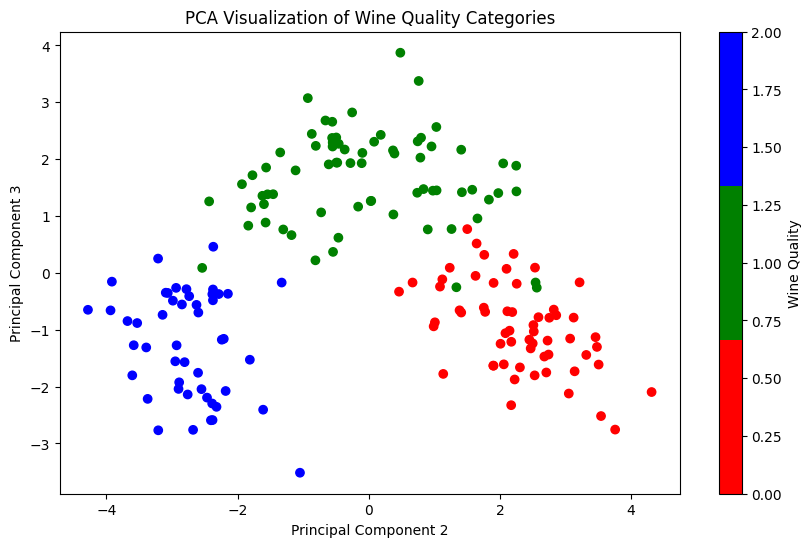

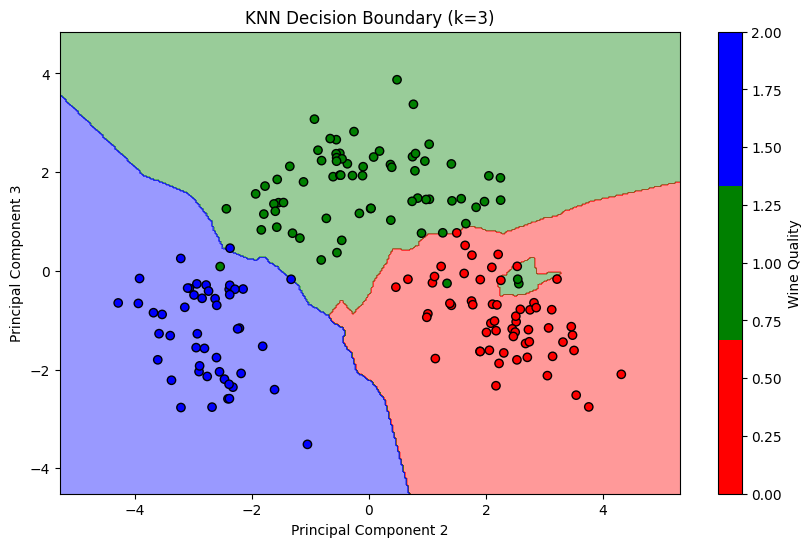

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from matplotlib.colors import ListedColormap

# Load the Wine Quality dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train KNN classifier
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a colormap for the target labels
cmap = ListedColormap(['red', 'green', 'blue'])

# Visualization 1: Scatter plot of PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA Visualization of Wine Quality Categories')
plt.colorbar(label='Wine Quality')
plt.show()

# Visualization 2: Decision boundary of KNN classifier
h = 0.03
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title(f'KNN Decision Boundary (k={k})')
plt.colorbar(label='Wine Quality')
plt.show()


In [42]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['alcohol'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['malic_acid'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['ash'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['alcalinity_of_ash'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['alcohol'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['malic_acid'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['ash'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['alcalinity_of_ash'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['alcohol', 'malic_acid'], ['malic_acid', 'ash'], ['ash', 'alcalinity_of_ash'], ['alcalinity_of_ash', 'magnesium']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['target', 'alcohol', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['target', 'malic_acid', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['target', 'ash', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['target', 'alcalinity_of_ash', None], **{})
chart

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



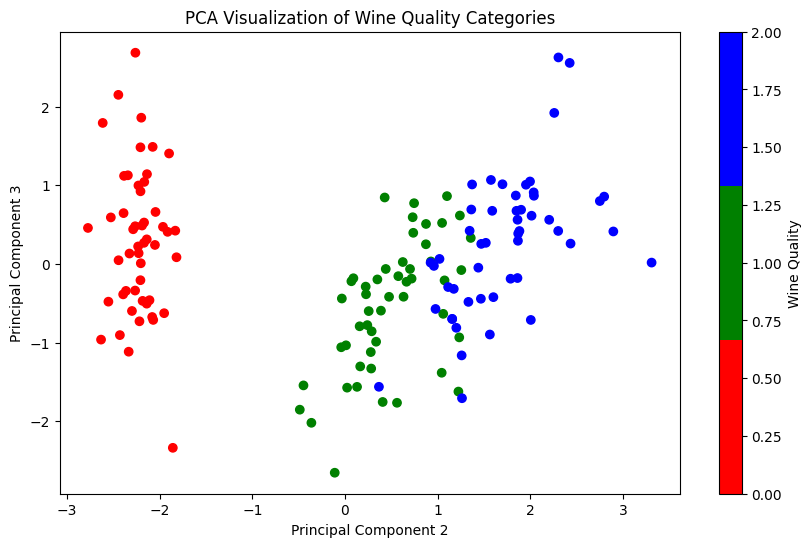

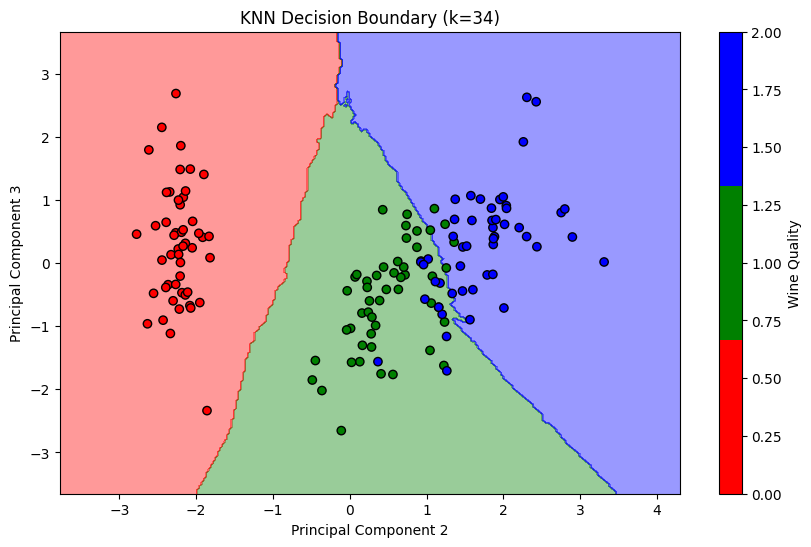

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Load the Wine Quality dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train KNN classifier
k = 34
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a colormap for the target labels
cmap = ListedColormap(['red', 'green', 'blue'])

# Visualization 1: Scatter plot of PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA Visualization of Wine Quality Categories')
plt.colorbar(label='Wine Quality')
plt.show()

# Visualization 2: Decision boundary of KNN classifier
h = 0.03
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title(f'KNN Decision Boundary (k={k})')
plt.colorbar(label='Wine Quality')
plt.show()


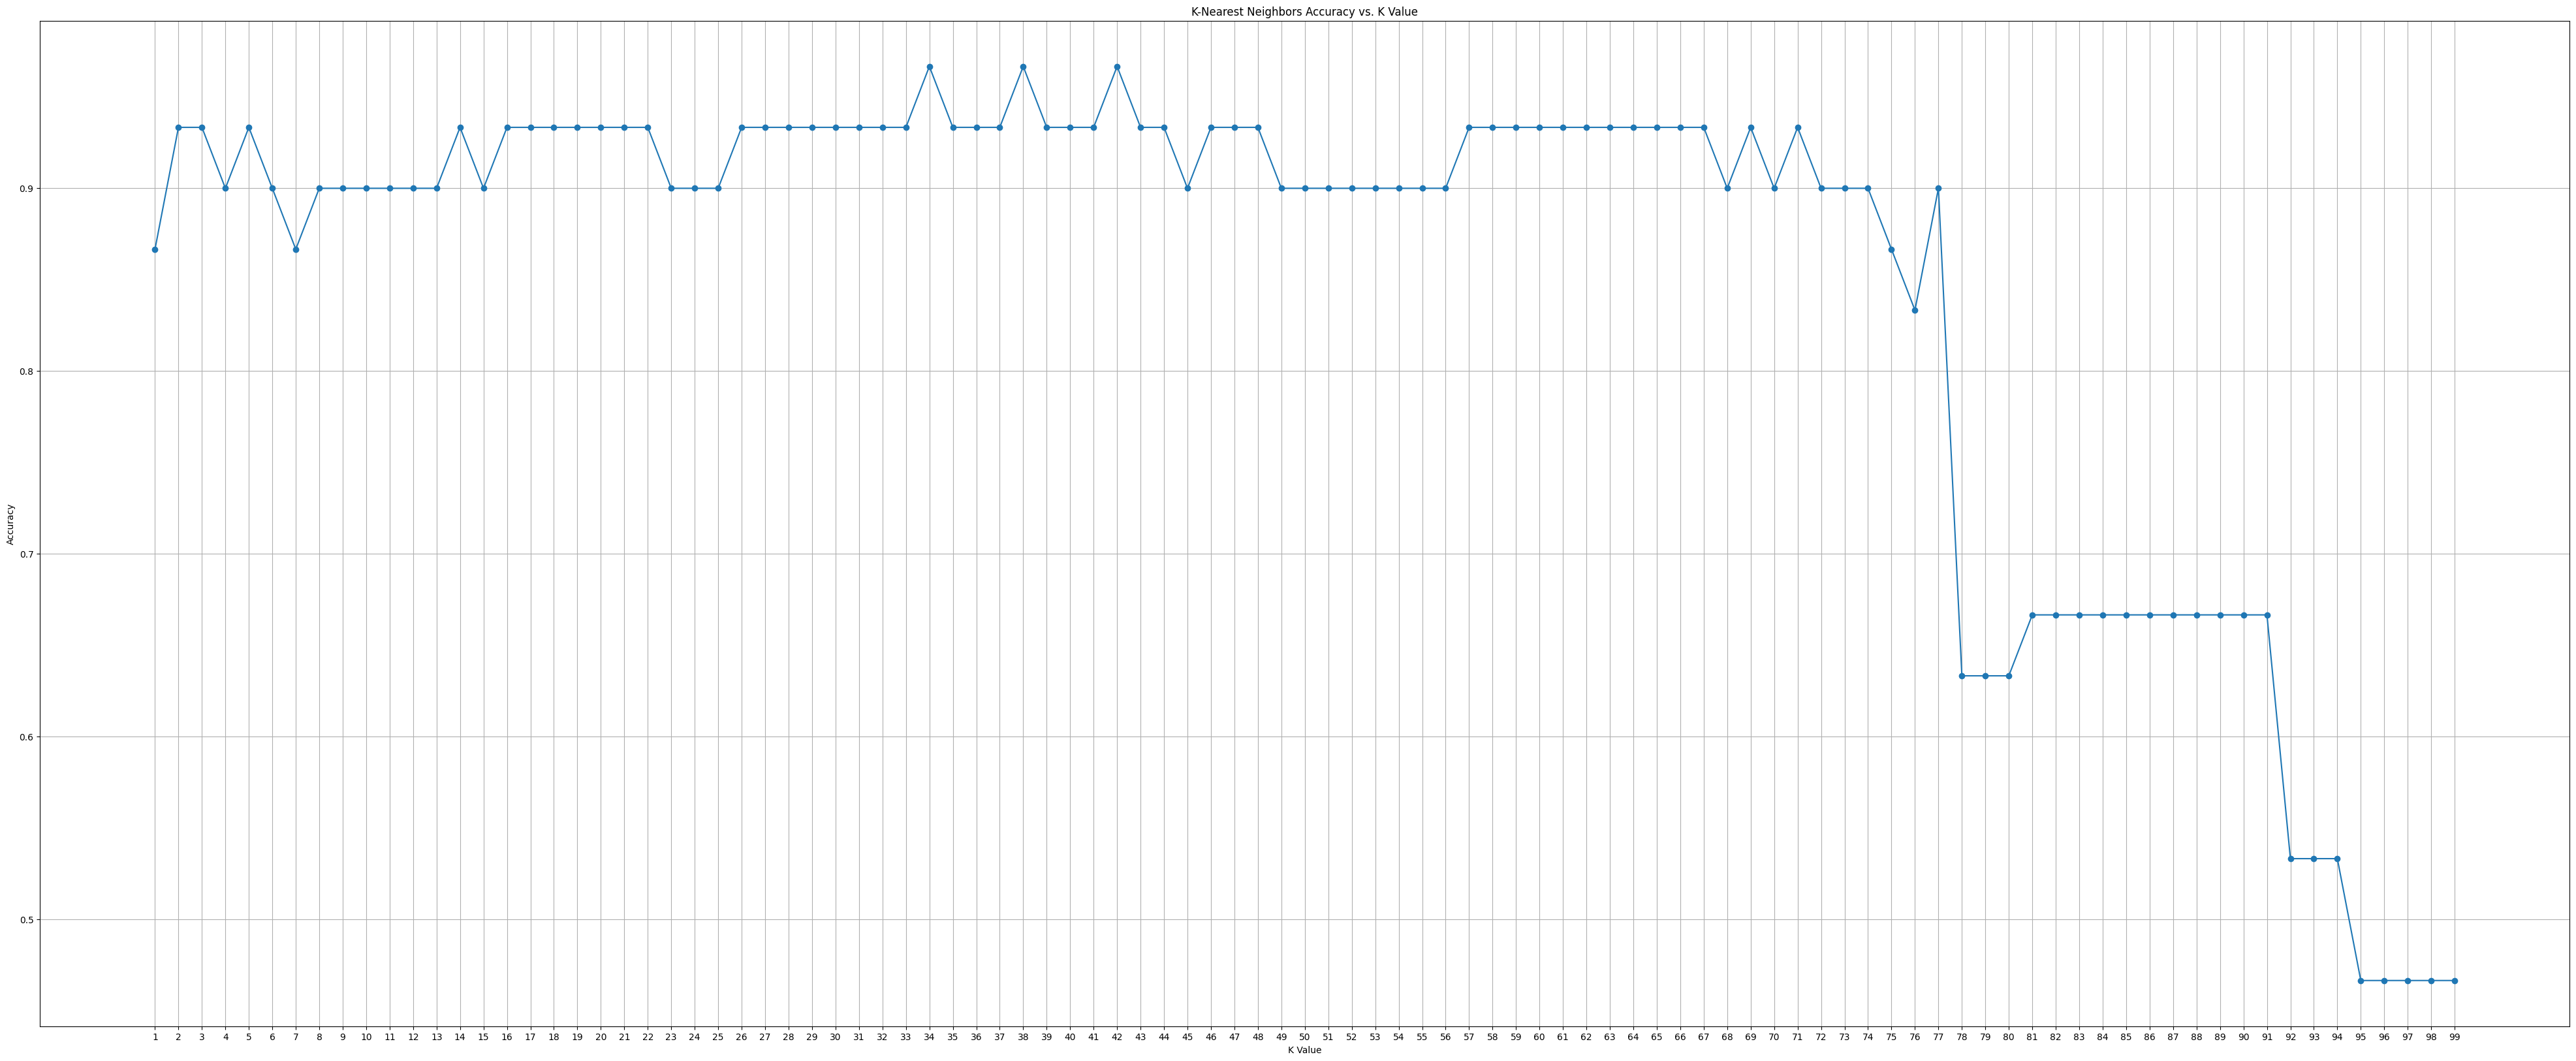

In [60]:
# Initialize lists to store K values and corresponding accuracies
k_values = []
accuracies = []

# Test different K values
for k in range(1, 100):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the relationship between K values and accuracies
plt.figure(figsize=(50, 20))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-Nearest Neighbors Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Visualization: Decision boundary of Logistic Regression classifier
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(label='Target Class')
plt.show()


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



ValueError: ignored

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



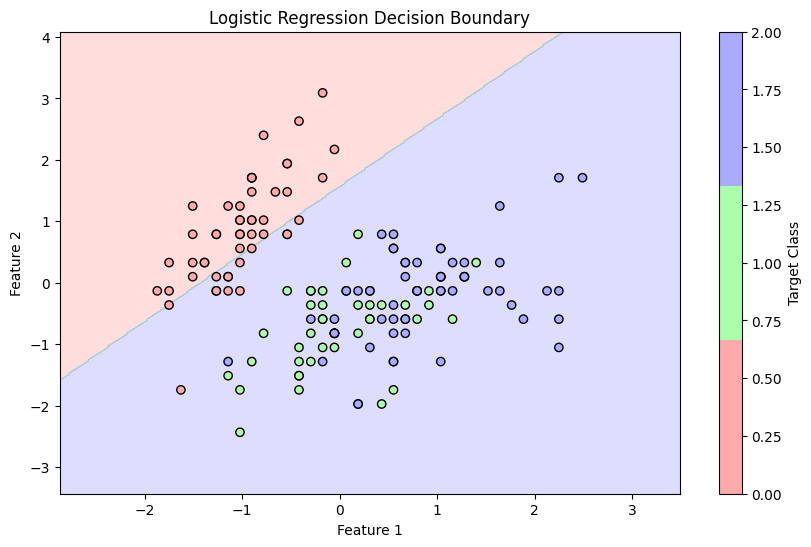

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Visualization: Decision boundary of Logistic Regression classifier
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg_classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(label='Target Class')
plt.show()


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from matplotlib.colors import ListedColormap

# Load the Iris dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Visualization: Decision boundary of Logistic Regression classifier
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg_classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(label='Target Class')
plt.show()


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



ValueError: ignored

Classification Report:
              precision    recall  f1-score   support

     class_0       0.79      0.79      0.79        14
     class_1       0.92      0.86      0.89        14
     class_2       0.56      0.62      0.59         8

    accuracy                           0.78        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.79      0.78      0.78        36



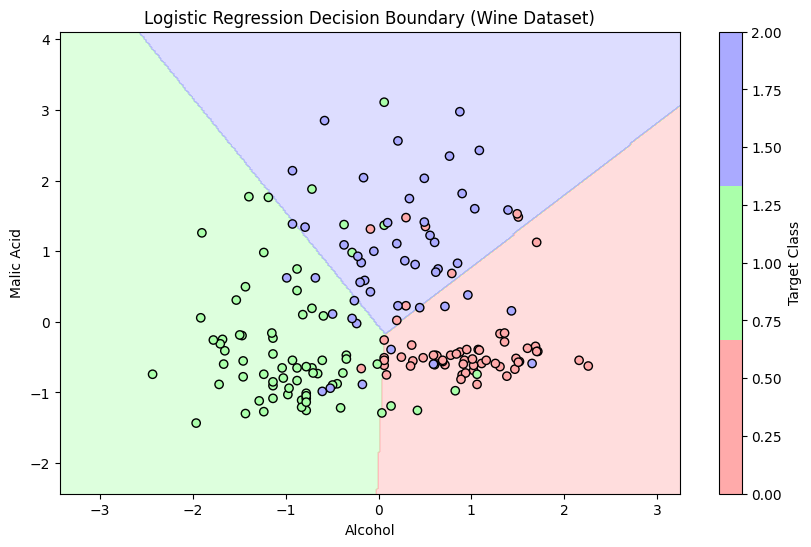

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from matplotlib.colors import ListedColormap

# Load the Wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Select two features for visualization
X = df[['alcohol', 'malic_acid']]
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Visualization: Decision boundary of Logistic Regression classifier
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Logistic Regression Decision Boundary (Wine Dataset)')
plt.colorbar(label='Target Class')
plt.show()


Classification Report:
              precision    recall  f1-score   support

     class_0       0.79      0.79      0.79        14
     class_1       0.92      0.86      0.89        14
     class_2       0.56      0.62      0.59         8

    accuracy                           0.78        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.79      0.78      0.78        36



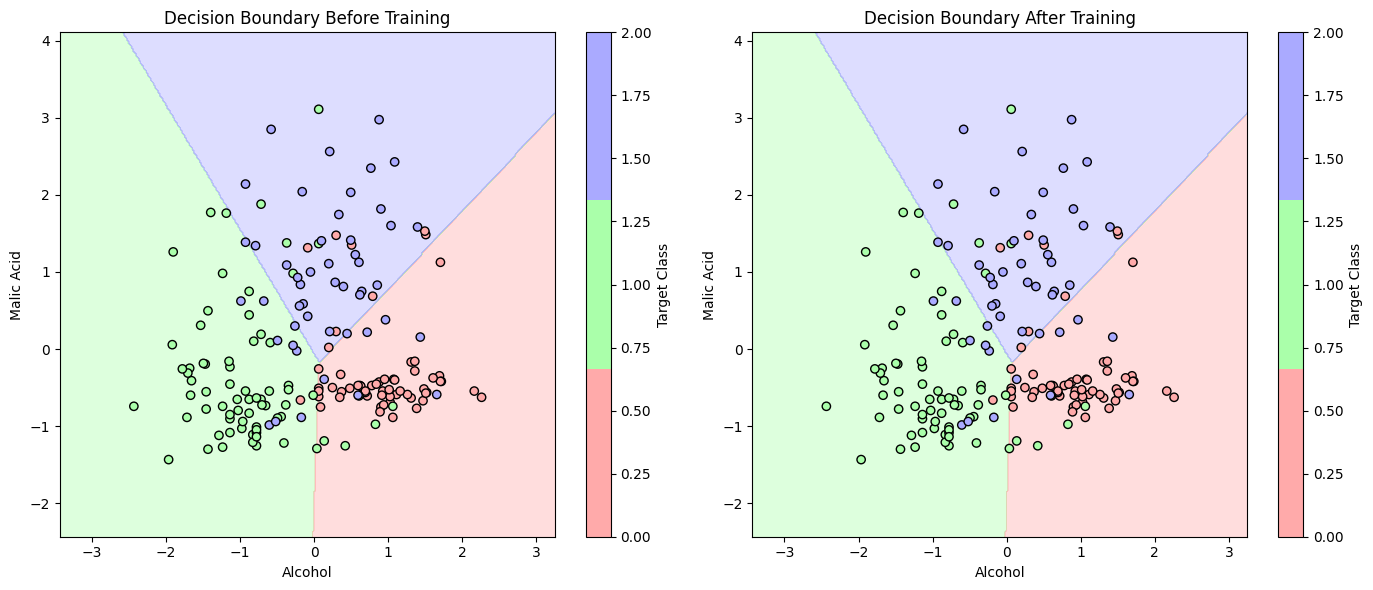

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from matplotlib.colors import ListedColormap

# Load the Wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Select two features for visualization
X = df[['alcohol', 'malic_acid']]
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Visualization: Decision boundary and training process of Logistic Regression
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision boundary before training
Z_before = logreg_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_before = Z_before.reshape(xx.shape)

# Decision boundary after training
logreg_classifier_after = LogisticRegression()
logreg_classifier_after.fit(X_train, y_train)
Z_after = logreg_classifier_after.predict(np.c_[xx.ravel(), yy.ravel()])
Z_after = Z_after.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Plot the decision boundary before training
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_before, alpha=0.4, cmap=cmap)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Decision Boundary Before Training')
plt.colorbar(label='Target Class')

# Plot the decision boundary after training
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_after, alpha=0.4, cmap=cmap)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Decision Boundary After Training')
plt.colorbar(label='Target Class')

plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

     class_0       0.79      0.79      0.79        14
     class_1       0.92      0.86      0.89        14
     class_2       0.56      0.62      0.59         8

    accuracy                           0.78        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.79      0.78      0.78        36



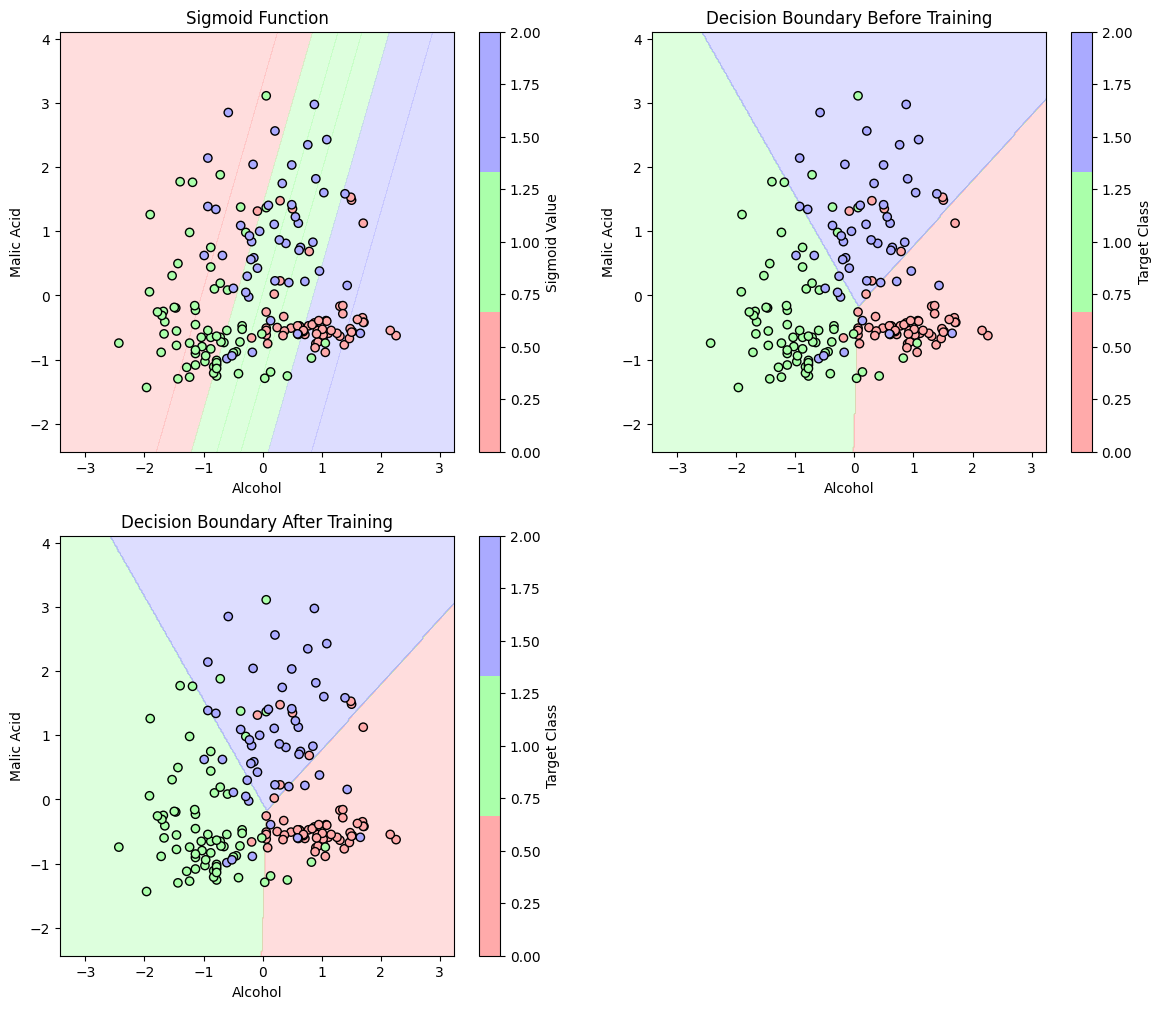

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from matplotlib.colors import ListedColormap

# Load the Wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Select two features for visualization
X = df[['alcohol', 'malic_acid']]
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Visualization: Sigmoid function, data points, and decision boundary of Logistic Regression
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the sigmoid values
Z_sigmoid = sigmoid(logreg_classifier.coef_[0][0] * xx + logreg_classifier.coef_[0][1] * yy + logreg_classifier.intercept_[0])

# Decision boundary before training
Z_before = logreg_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_before = Z_before.reshape(xx.shape)

# Decision boundary after training
logreg_classifier_after = LogisticRegression()
logreg_classifier_after.fit(X_train, y_train)
Z_after = logreg_classifier_after.predict(np.c_[xx.ravel(), yy.ravel()])
Z_after = Z_after.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Plot the sigmoid function
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.contourf(xx, yy, Z_sigmoid, alpha=0.4, cmap=cmap)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Sigmoid Function')
plt.colorbar(label='Sigmoid Value')

# Plot the decision boundary before training
plt.subplot(2, 2, 2)
plt.contourf(xx, yy, Z_before, alpha=0.4, cmap=cmap)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Decision Boundary Before Training')
plt.colorbar(label='Target Class')

# Plot the decision boundary after training
plt.subplot(2, 2, 3)
plt.contourf(xx, yy, Z_after, alpha=0.4, cmap=cmap)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Decision Boundary After Training')
plt.colorbar(label='Target Class')

# plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.95      0.96      0.95        98

    accuracy                           0.93       130
   macro avg       0.91      0.90      0.91       130
weighted avg       0.93      0.93      0.93       130



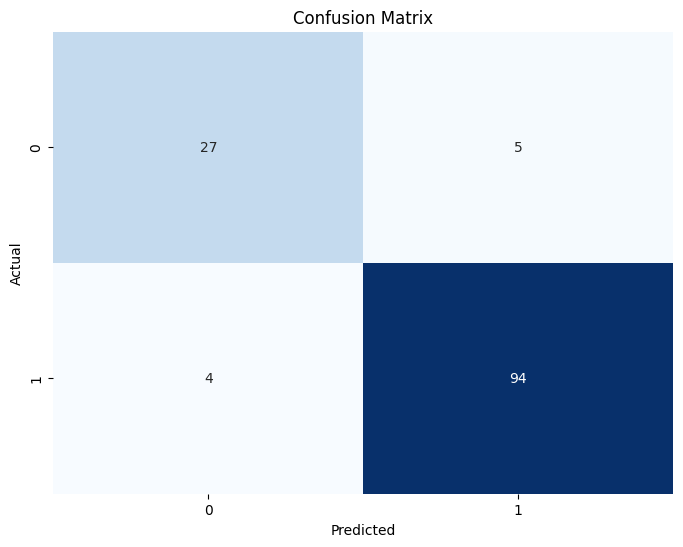

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Load the Iris dataset

df=pd.read_csv("student-por.csv")
df['Label'] = df['G3'].apply(lambda x: '1' if x > 10 else '0')

columns_to_encode = ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
# Separate features and target
X = df.drop(['Label','G3'], axis=1)
y = df['Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Load the Iris dataset

df=pd.read_csv("student-por.csv")
df['Label'] = df['G3'].apply(lambda x: '1' if x > 10 else '0')

columns_to_encode = ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
# Separate features and target
X = df.drop(['Label','G3'], axis=1)
y = df['Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1    1   17        1        1        1     3     1     3     3  ...   
648       1    1   18        0        1        1     3     2     3     2  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
0           0       4         3      4     1     1       3         4   0  11  
1           0       5         3      3     1     1       3         2   9  11  
2           0       4         3      2     2     3       3         6  12  13  
3           1       3         2      2     1     1       5         0  14  14  
4           0       4         3      2     1     2       5         0  11  13  
..        ...     ...       ...    ...   ...   ...     ...       ...  ..  ..  
644         0       5         4      2     1     2       5         4  10  11  
645         0       4         3      4     1     1       1         4  15  15  
646         0       1         1      1     1     1       5         6  11  12  
647         0       2         4      5     3     4       2         6  10  10  
648         0       4         4      1     3     4       5         4  10  11  

[649 rows x 32 columns]

In [ ]:




# # Visualization: Decision boundary of Logistic Regression classifier
# h = 0.02
# x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
# y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z = logreg_classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
# Z = Z.reshape(xx.shape)

# cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# plt.figure(figsize=(10, 6))
# plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=cmap)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Logistic Regression Decision Boundary')
# plt.colorbar(label='Target Class')
# plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        32
           1       0.87      0.95      0.91        98

    accuracy                           0.85       130
   macro avg       0.83      0.76      0.78       130
weighted avg       0.85      0.85      0.85       130



TypeError: ignored

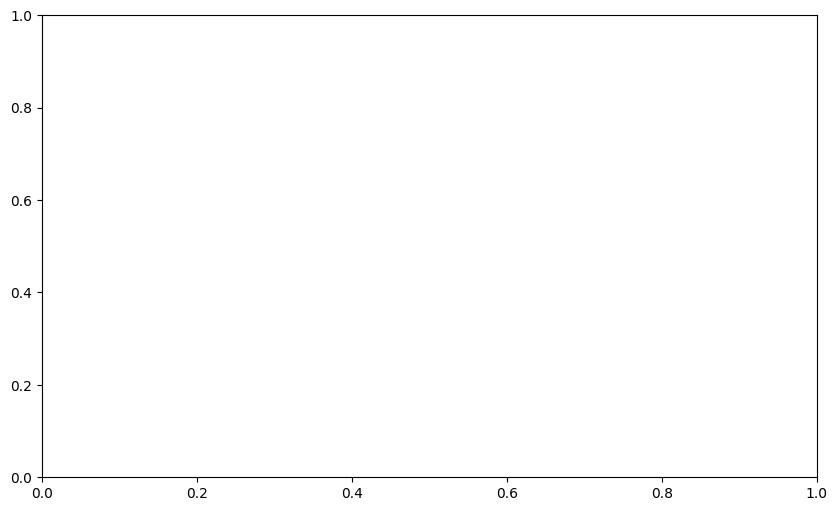

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Load the dataset
df = pd.read_csv("student-por.csv")
df['Label'] = df['G3'].apply(lambda x: '1' if x > 10 else '0')

columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Separate features and target
X = df.drop(['Label', 'G3'], axis=1)
y = df['Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualization: Decision boundary of Logistic Regression classifier with PCA
h = 0.01
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary with PCA')
plt.colorbar(label='Target Class')
plt.show()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Load the dataset
df = pd.read_csv("student-por.csv")
df['Label'] = df['G3'].apply(lambda x: '1' if x > 10 else '0')

columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Separate features and target
X = df.drop(['Label', 'G3'], axis=1)
y = df['Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualization: Decision boundary of Logistic Regression classifier with PCA
h = 0.01
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap=cmap, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=cmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary with PCA')
plt.colorbar(label='Target Class')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        32
           1       0.87      0.95      0.91        98

    accuracy                           0.85       130
   macro avg       0.83      0.76      0.78       130
weighted avg       0.85      0.85      0.85       130



UFuncTypeError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Load the Iris dataset

df=pd.read_csv("student-por.csv")
df['Label'] = df['G3'].apply(lambda x: '1' if x > 10 else '0')

columns_to_encode = ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
# Separate features and target
X = df.drop(['Label','G3'], axis=1)
y = df['Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()